In [85]:
# importing required libraries

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


In [86]:
test_data = pd.read_csv("./telecom-churn-case-study-hackathon-c41/test.csv")
test_data_original = test_data

train_data = pd.read_csv("./telecom-churn-case-study-hackathon-c41/train.csv")

data_dict = pd.read_csv("./telecom-churn-case-study-hackathon-c41/data_dictionary.csv")

### Step 1: Eyeballing and Understanding data

In [87]:
train_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [88]:
train_data.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [89]:
print("Columns: ",train_data.columns)
print("Shape: ",train_data.shape)

Columns:  Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)
Shape:  (69999, 172)


In [90]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [91]:
types = train_data.dtypes

In [92]:
types

id                     int64
circle_id              int64
loc_og_t2o_mou       float64
std_og_t2o_mou       float64
loc_ic_t2o_mou       float64
                      ...   
aon                    int64
aug_vbc_3g           float64
jul_vbc_3g           float64
jun_vbc_3g           float64
churn_probability      int64
Length: 172, dtype: object

In [93]:
# list columns with dtype as object
keys = types.keys()
column_with_type_object = []
for key in keys:
    if types[key] == 'object':
        column_with_type_object.append(key)

print("Columns with object type :")
print(column_with_type_object)

Columns with object type :
['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']


In [94]:
train_data[column_with_type_object].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014


In [95]:
train_data[column_with_type_object].describe()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
count,69999,69600,69266,68898,68765,67538,17568,17865,18417
unique,1,1,1,30,31,31,30,31,31
top,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/31/2014
freq,69999,69600,69266,11880,12206,10324,1317,1282,1388


In [96]:
# finding columns with single unique values

columns_with_one_unique_value = []

print("Columns with Only 1 unique value :\n")
for column in train_data.columns:
    if len(dict(train_data[column].value_counts()).keys()) == 1:
        print(column)
        columns_with_one_unique_value.append(column)

Columns with Only 1 unique value :

circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_ic_t2o_mou_6
std_ic_t2o_mou_7
std_ic_t2o_mou_8


* id is a unique idenifier for rows, so does not have any impact on the churn, so can be removed from dataset

* columns : circle_id, last_date_of_month_6, last_date_of_month_7,last_date_of_month_8 etc .have single unique values in dataset. Will not have no impact on the churn_probability , So these columns can be removed from the datasets

In [97]:
train_data.isnull().describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999,69999,69999,69999,69999,69999,69999,69999,69999,69999,...,69999,69999,69999,69999,69999,69999,69999,69999,69999,69999
unique,1,1,2,2,2,1,2,2,1,1,...,1,1,2,2,2,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
freq,69999,69999,69297,69297,69297,69999,69600,69266,69999,69999,...,69999,69999,52431,52134,51582,69999,69999,69999,69999,69999


In [98]:
# finding percentage of null values in columns

def find_null_values_percentage(df):
    res = [{'column_name': col, 'null_percentage': round(((df[col].isna().sum())/df.shape[0])*100,2)} for col in df.columns]
    return res

In [99]:
columns_nan_data = pd.DataFrame(find_null_values_percentage(train_data))

In [100]:
columns_nan_data.describe(percentiles=[0.25,0.5,0.8,0.82,0.83,0.85,0.9,0.95])

,null_percentage
count,172.000000
mean,15.241221
std,27.320308
min,0.000000
25%,0.000000
50%,3.950000
80%,5.290000
82%,5.290000
83%,68.902000
85%,73.690000


* As seen above there are around 15% of the columns have high percentage (>70) of Nan values ,thus have no significant impact on the output. So these columns can be dropped during hyper parameter tuning, based on the their correlation with the target feature. 

* Features with high null values cannot be injected with mean, median or mode values, and injecting these values as 0 may make the feature bias or generate ouliers in the feature.


In [101]:
# Columns with high Nan values

columns_exeeding_null_threshold=columns_nan_data[columns_nan_data['null_percentage']>65.0]
columns_exeeding_null_threshold

,column_name,null_percentage
119,date_of_last_rech_data_6,74.90
120,date_of_last_rech_data_7,74.48
121,date_of_last_rech_data_8,73.69
122,total_rech_data_6,74.90
123,total_rech_data_7,74.48
124,total_rech_data_8,73.69
125,max_rech_data_6,74.90
126,max_rech_data_7,74.48
127,max_rech_data_8,73.69
128,count_rech_2g_6,74.90


In [102]:
train_data[list(columns_exeeding_null_threshold['column_name'])].describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,...,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8
count,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,...,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,2.467612,2.679989,2.652441,126.500000,126.402071,125.374925,1.865323,2.056311,2.016018,0.602288,...,90.618564,86.863900,85.846074,86.348404,0.025273,0.024069,0.021013,0.916325,0.909544,0.890319
std,2.794610,3.073472,3.101265,109.352573,109.459266,109.648799,2.566377,2.799916,2.728246,1.279297,...,189.907986,171.321203,178.067280,170.297094,0.156958,0.153269,0.143432,0.276907,0.286842,0.312501
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,-24.490000,-35.830000,-13.090000,-55.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,1.000000,145.000000,145.000000,145.000000,1.000000,1.000000,1.000000,0.000000,...,0.840000,11.300000,8.800000,9.090000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,2.000000,2.000000,2.000000,1.000000,...,122.070000,122.070000,122.070000,122.070000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,61.000000,54.000000,60.000000,1555.000000,1555.000000,1555.000000,42.000000,48.000000,44.000000,29.000000,...,3716.900000,5054.350000,4809.360000,3483.170000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Exploring columns with null values

In [103]:
# finding columns with null values
temp_cols = set(train_data.columns)-set(column_with_type_object)
columns_with_null_values = train_data[temp_cols].isnull().any().to_dict()

/tmp/ipykernel_26718/2582422320.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  columns_with_null_values = train_data[temp_cols].isnull().any().to_dict()


In [104]:
columns_with_null_values

{'std_og_t2m_mou_6': True,
 'std_ic_t2t_mou_6': True,
 'arpu_7': False,
 'loc_og_t2c_mou_6': True,
 'isd_og_mou_7': True,
 'count_rech_3g_6': True,
 'monthly_3g_7': False,
 'sachet_2g_8': False,
 'max_rech_data_7': True,
 'roam_og_mou_8': True,
 'total_rech_data_6': True,
 'total_ic_mou_7': False,
 'loc_ic_t2f_mou_6': True,
 'roam_og_mou_7': True,
 'roam_ic_mou_8': True,
 'std_ic_t2o_mou_6': True,
 'sachet_2g_7': False,
 'loc_og_t2m_mou_8': True,
 'loc_ic_t2f_mou_7': True,
 'fb_user_6': True,
 'onnet_mou_7': True,
 'vol_3g_mb_6': False,
 'std_ic_t2t_mou_7': True,
 'circle_id': False,
 'max_rech_data_8': True,
 'last_day_rch_amt_6': False,
 'std_og_t2c_mou_8': True,
 'offnet_mou_8': True,
 'std_og_t2c_mou_6': True,
 'std_og_t2t_mou_7': True,
 'total_rech_data_8': True,
 'count_rech_2g_6': True,
 'monthly_2g_7': False,
 'loc_ic_t2t_mou_6': True,
 'std_og_t2f_mou_6': True,
 'isd_ic_mou_8': True,
 'total_rech_data_7': True,
 'loc_ic_t2m_mou_7': True,
 'total_rech_num_6': False,
 'monthly_3

In [105]:
# plotting/describing numerical columns with null values for better exploration and null value injection

for column in columns_with_null_values:
    if columns_with_null_values[column] == True:
        print("Column Name : ",column)
        mean = train_data[column].mean()
        median = train_data[column].median()
        print("Mean :", mean)
        print("Median :", median)
        print("\n-----------------------------------------\n")

Column Name :  std_og_t2m_mou_6
Mean : 88.1521097410421
Median : 3.98

-----------------------------------------

Column Name :  std_ic_t2t_mou_6
Mean : 9.476957802204339
Median : 0.0

-----------------------------------------

Column Name :  loc_og_t2c_mou_6
Mean : 1.1260254941916676
Median : 0.0

-----------------------------------------

Column Name :  isd_og_mou_7
Mean : 0.8110995067744237
Median : 0.0

-----------------------------------------

Column Name :  count_rech_3g_6
Mean : 0.6022882513661202
Median : 0.0

-----------------------------------------

Column Name :  max_rech_data_7
Mean : 126.40207108872096
Median : 145.0

-----------------------------------------

Column Name :  roam_og_mou_8
Mean : 9.771783063834922
Median : 0.0

-----------------------------------------

Column Name :  total_rech_data_6
Mean : 2.4676115664845173
Median : 1.0

-----------------------------------------

Column Name :  loc_ic_t2f_mou_6
Mean : 12.05067230890512
Median : 0.88

-----------------

/tmp/ipykernel_26718/1518107491.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(40,20))


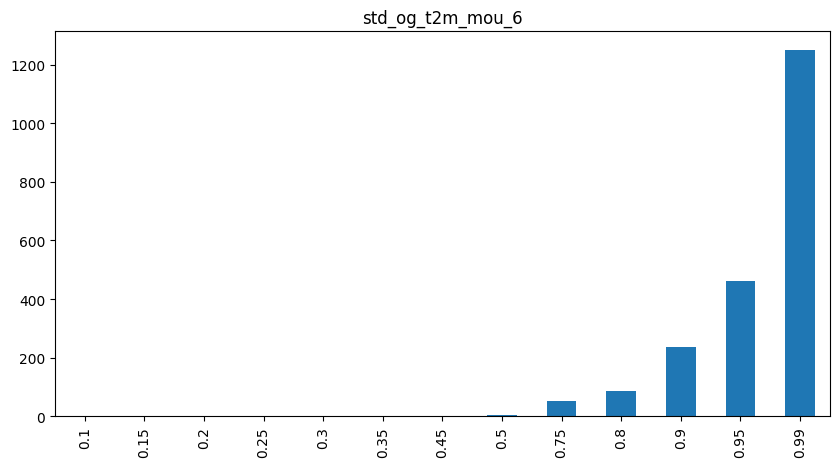

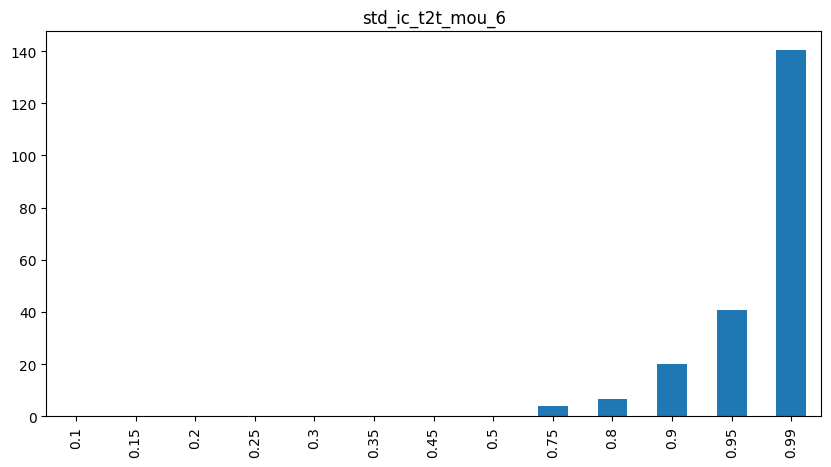

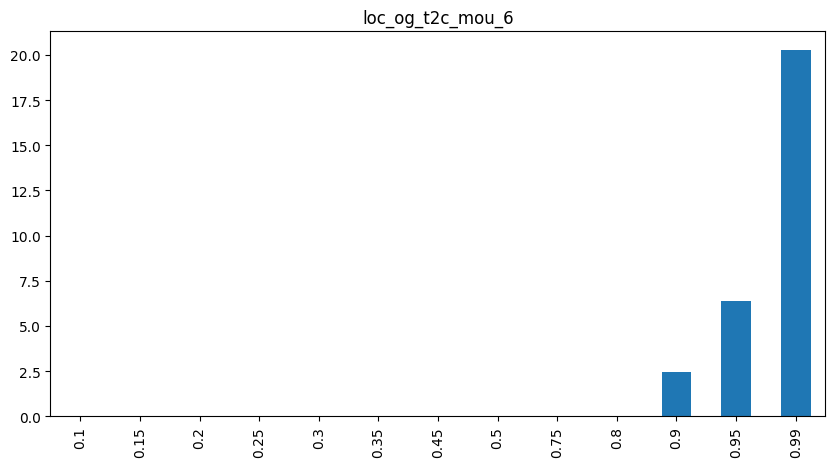

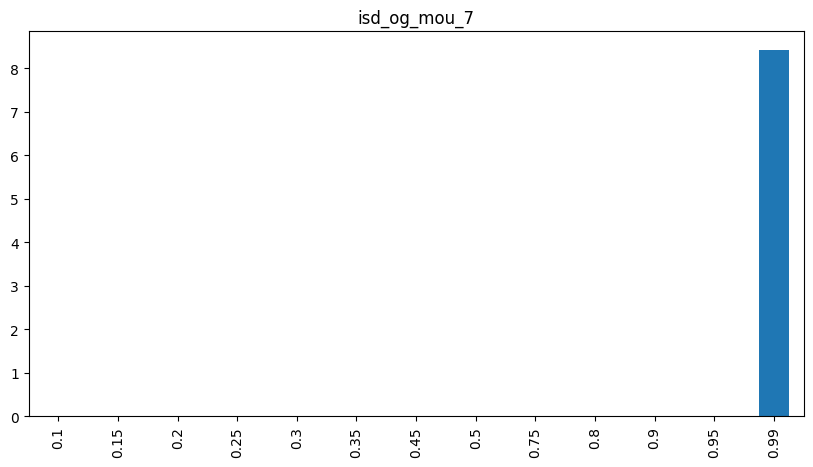

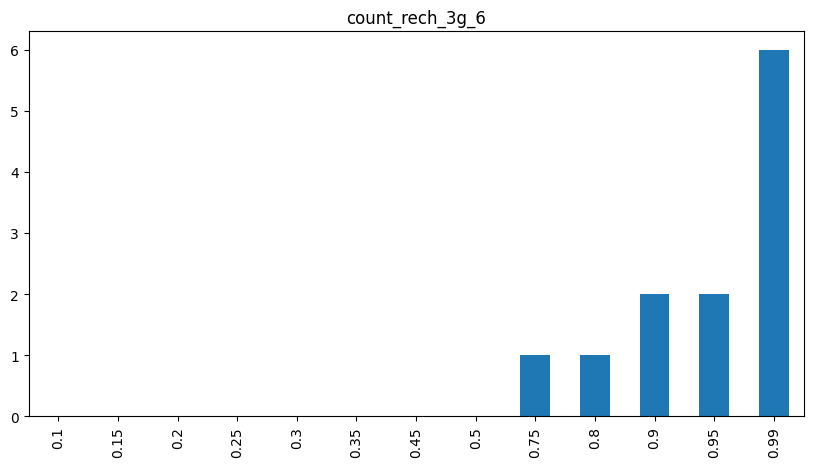

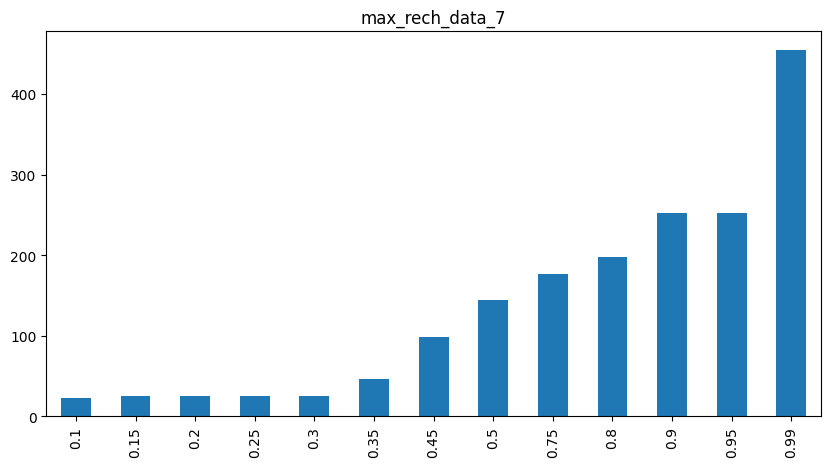

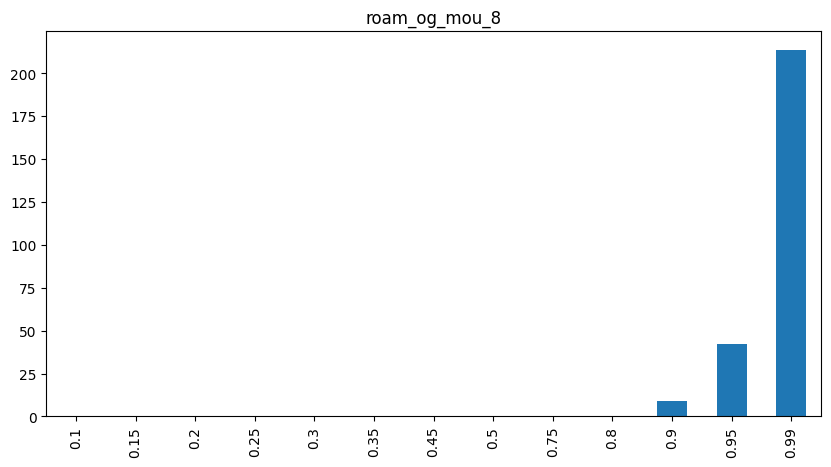

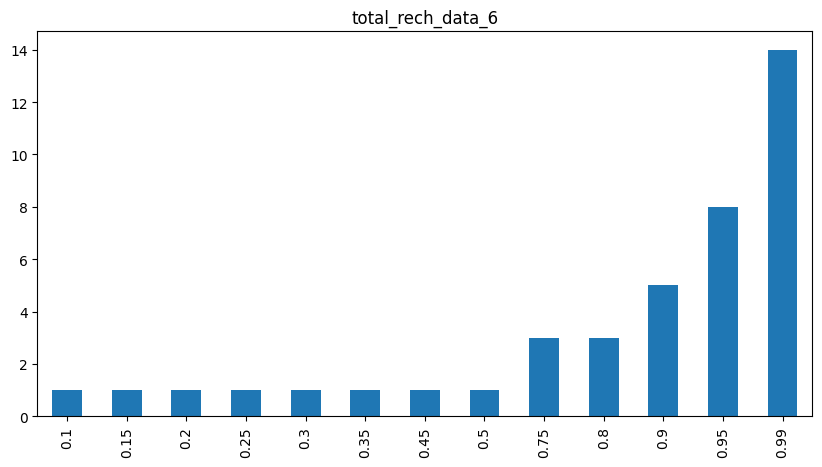

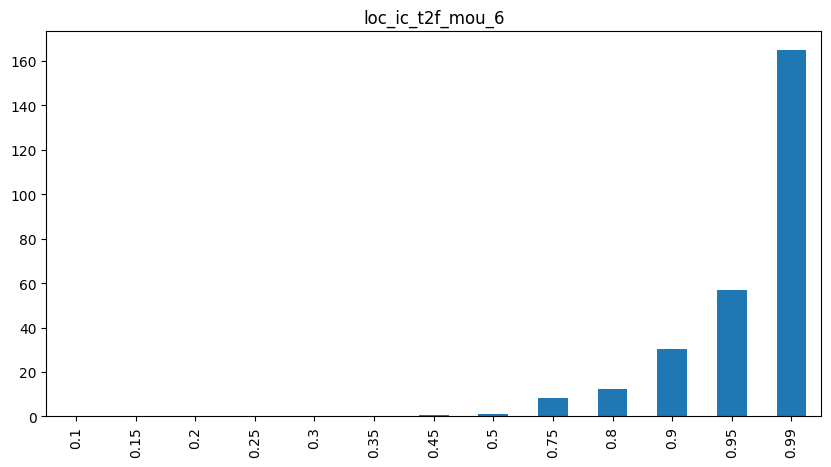

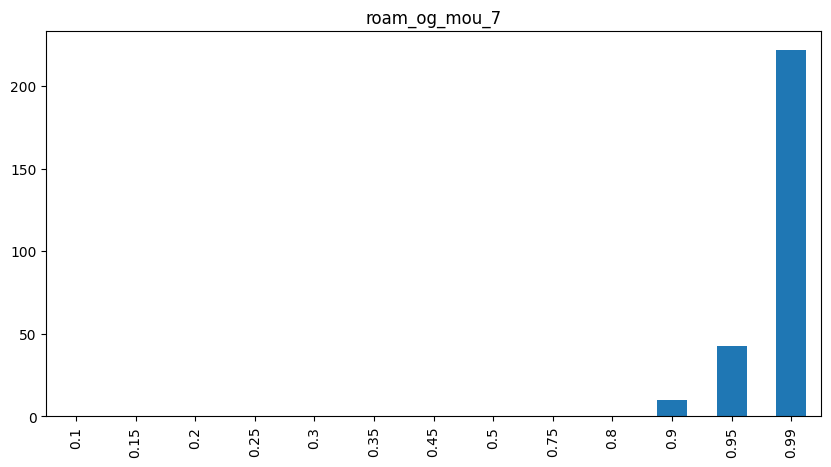

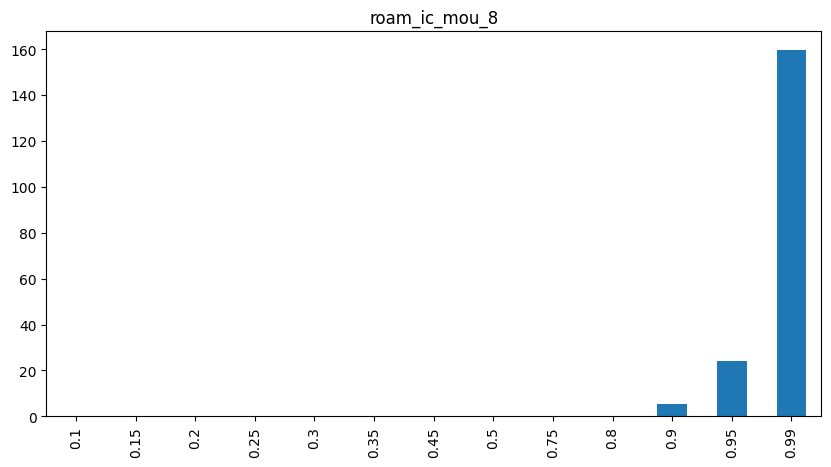

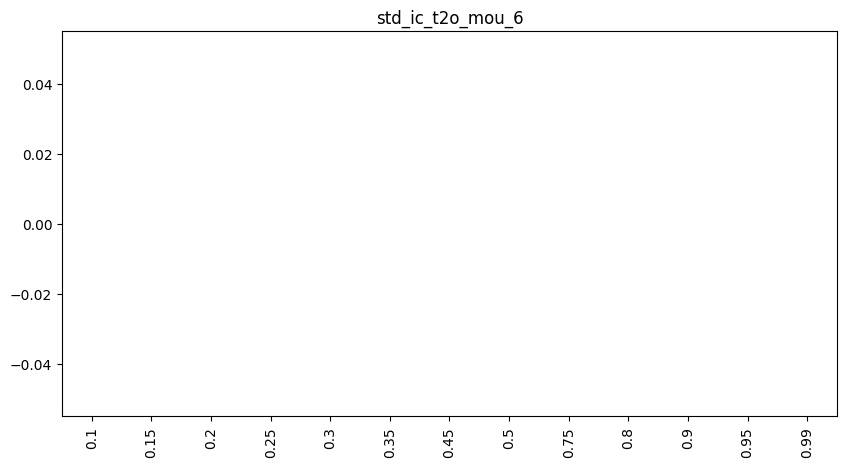

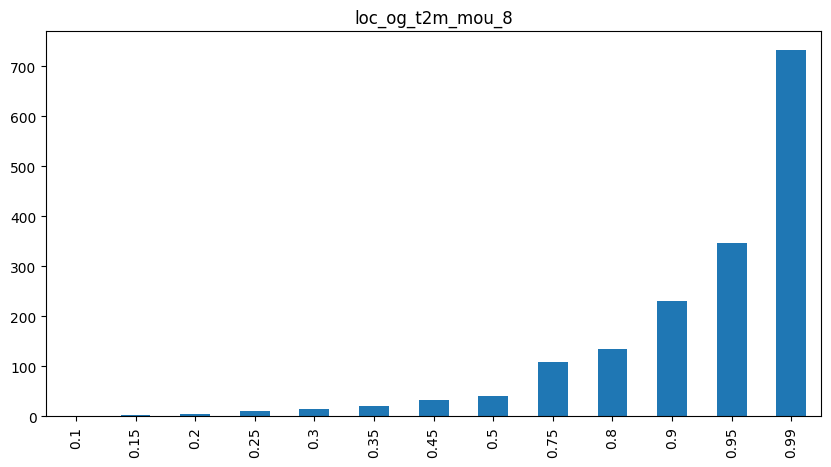

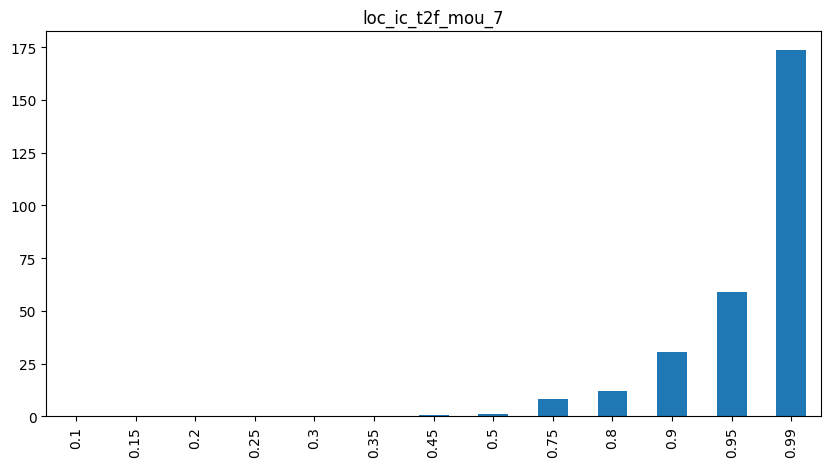

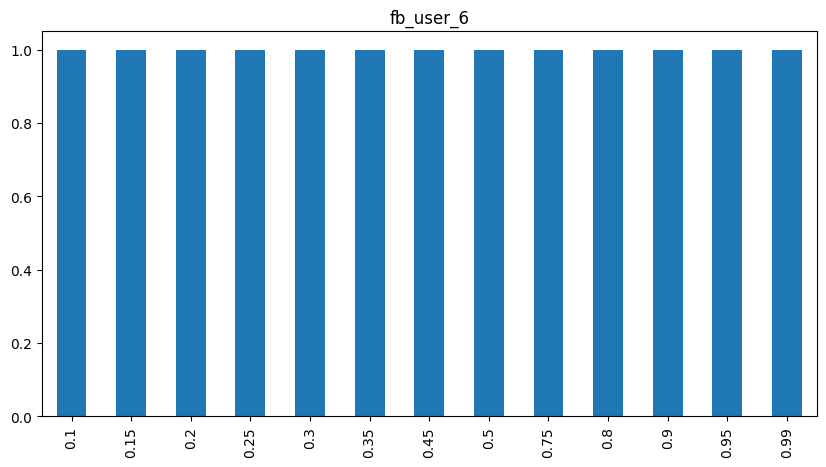

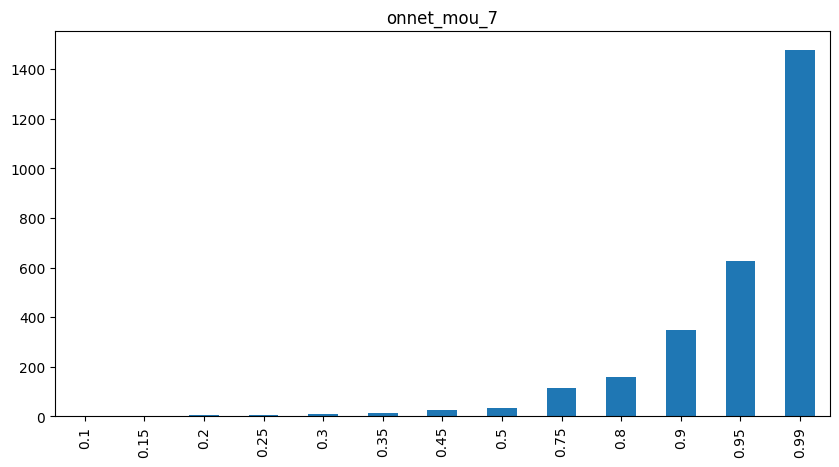

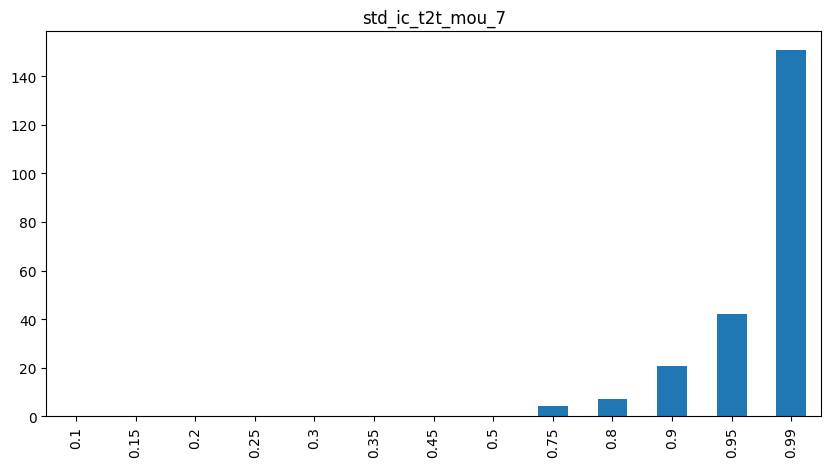

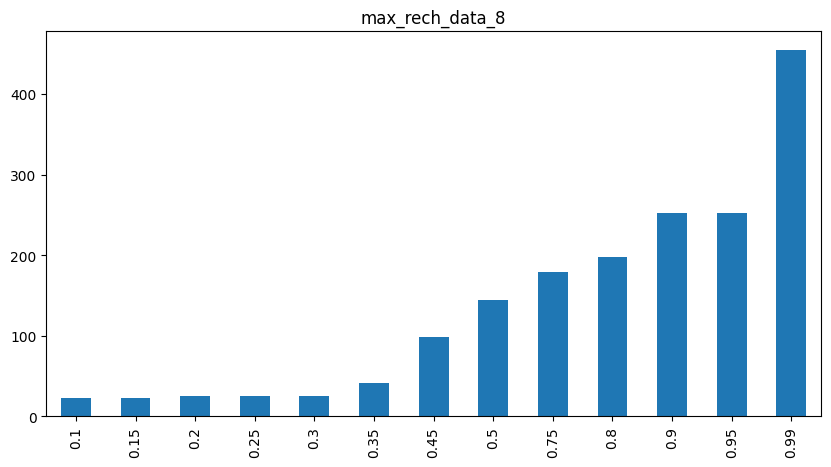

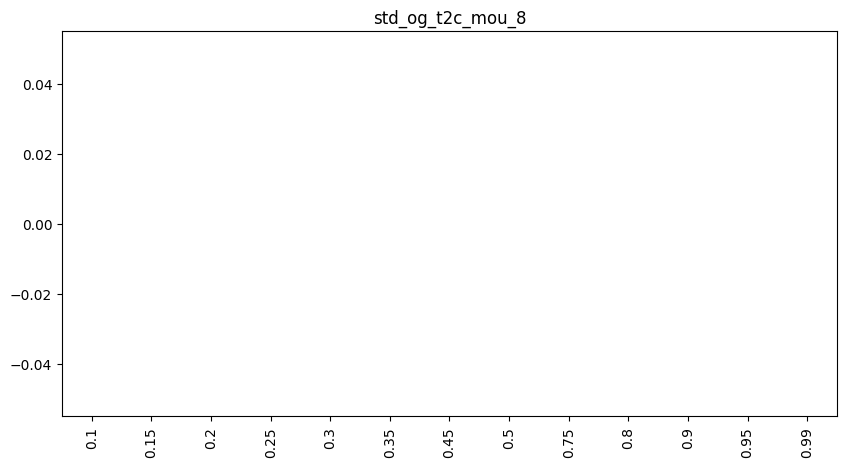

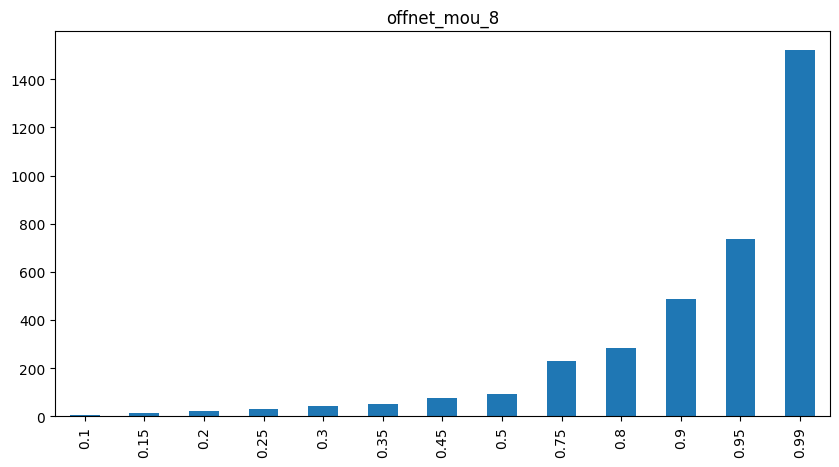

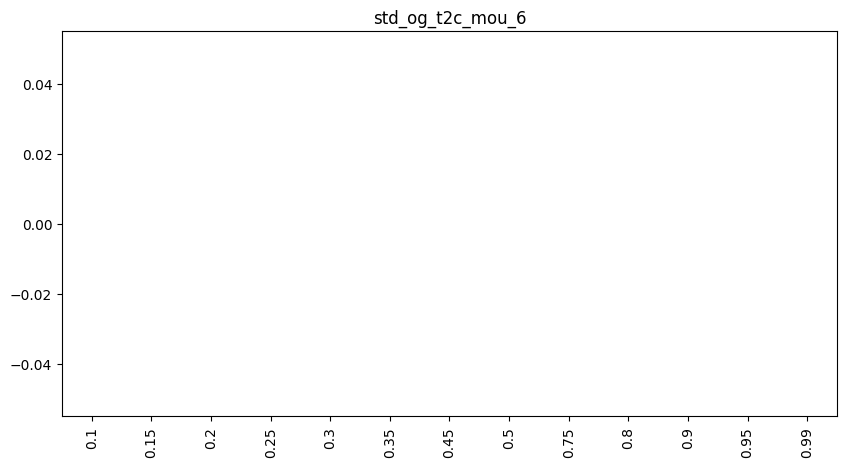

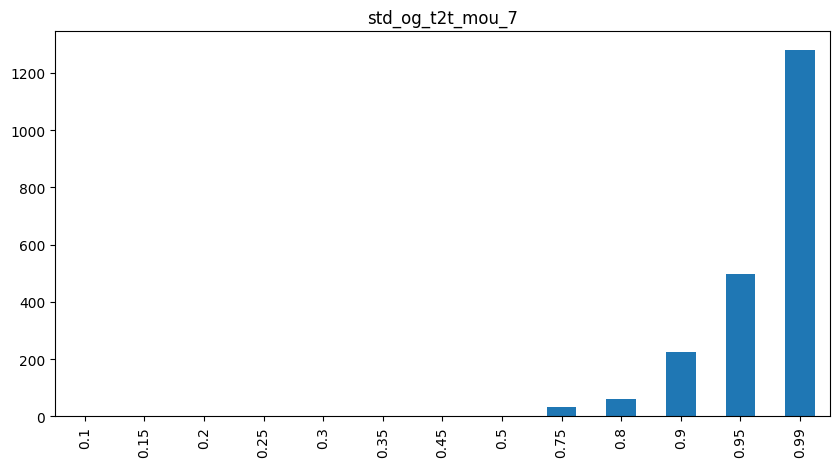

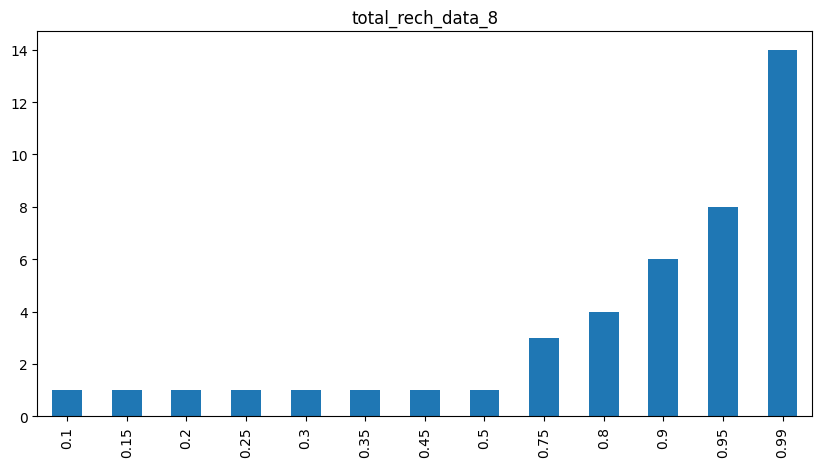

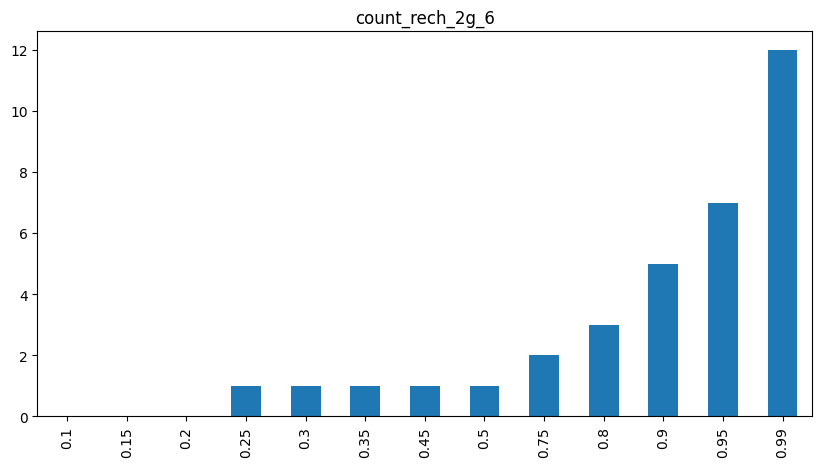

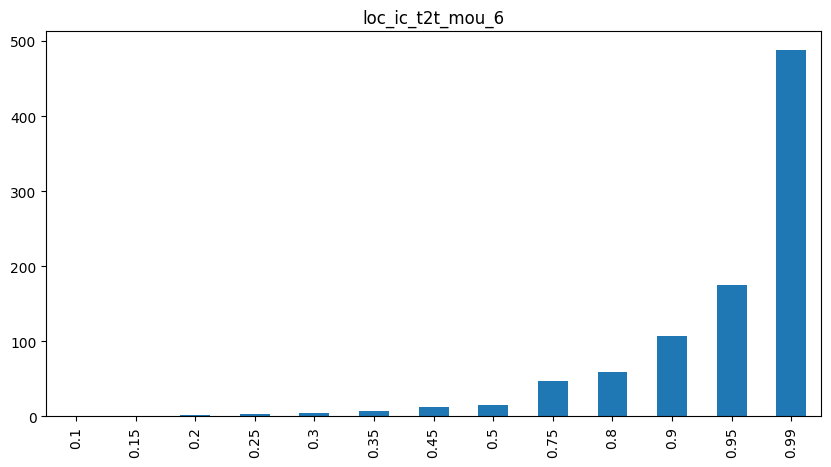

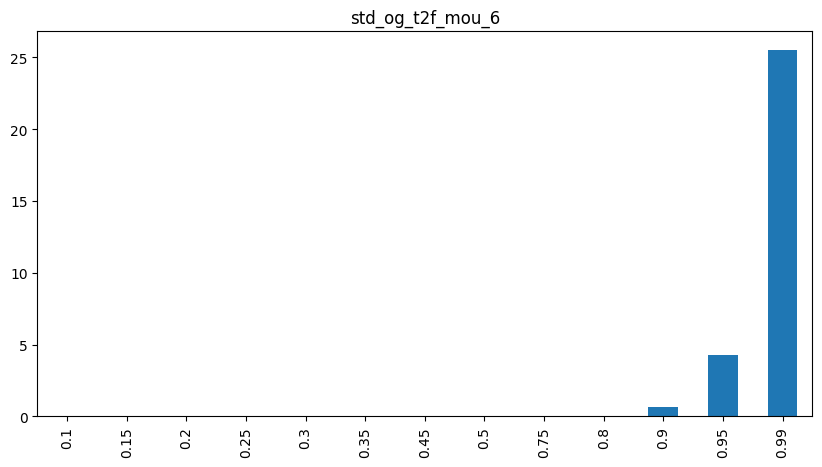

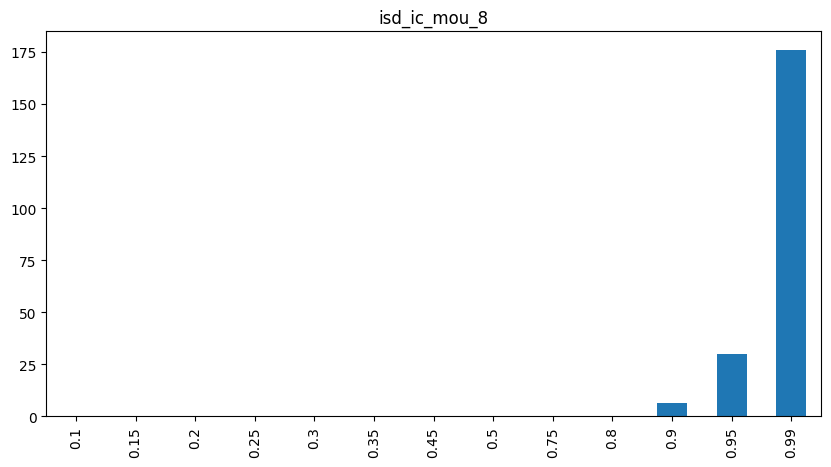

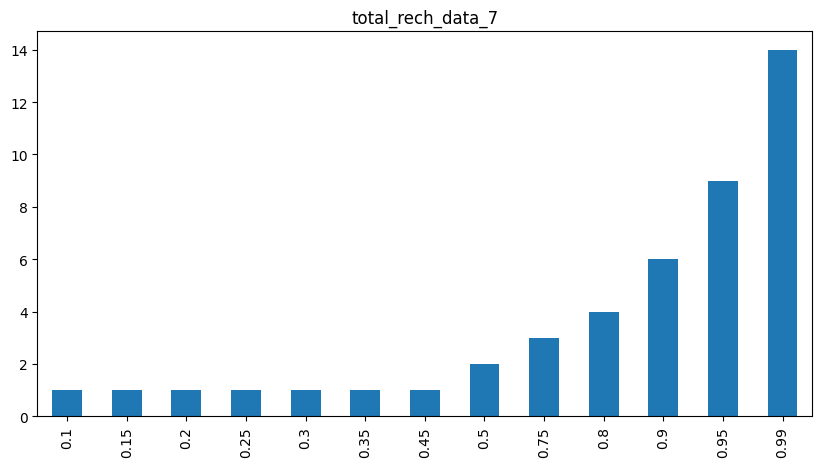

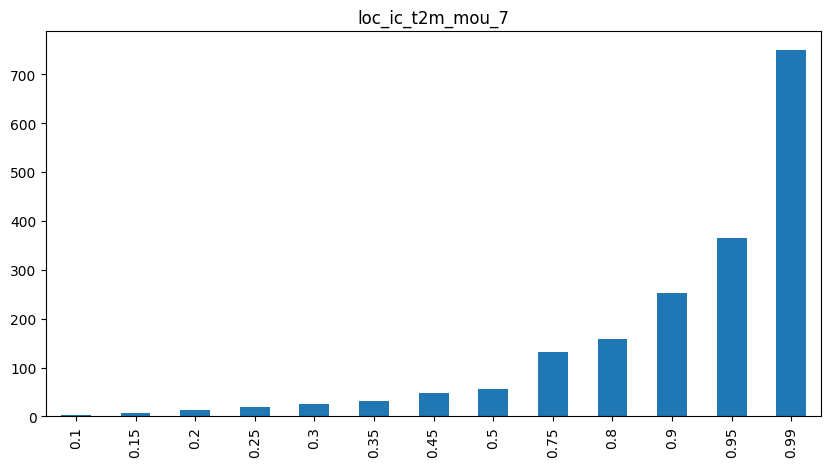

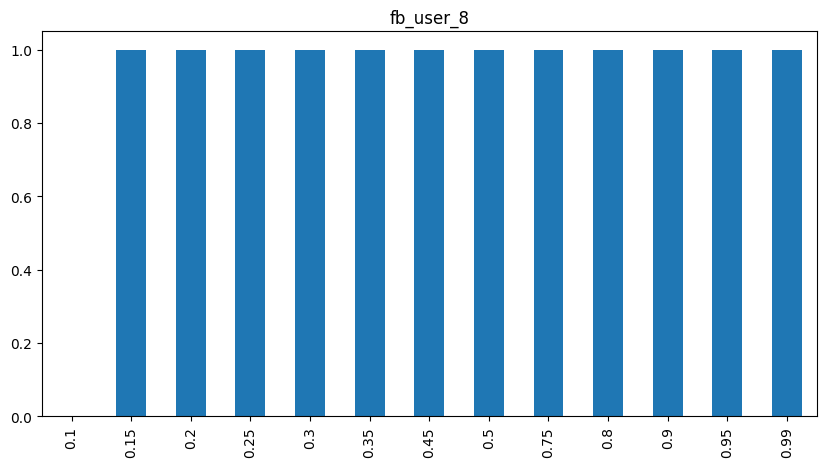

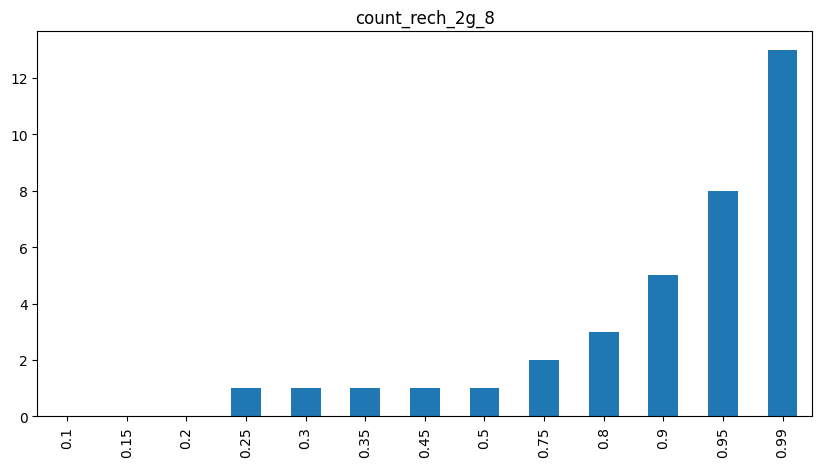

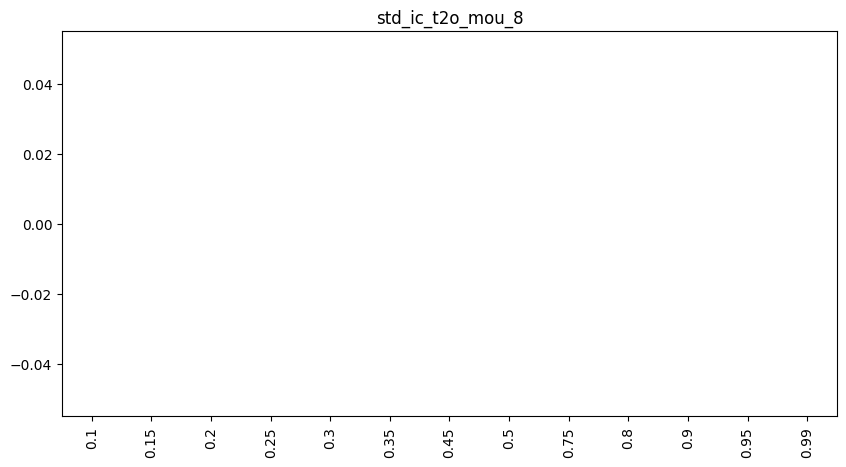

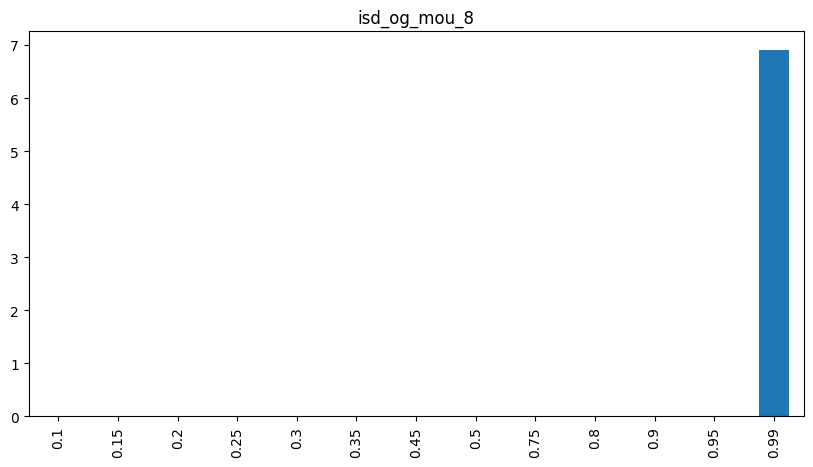

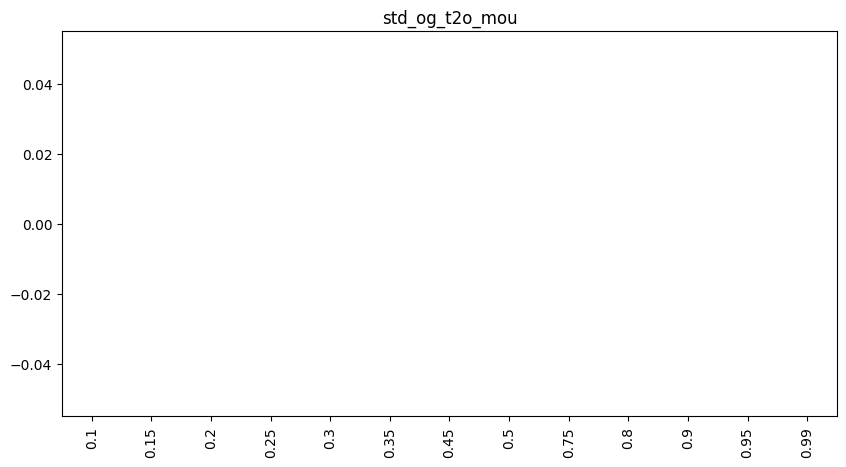

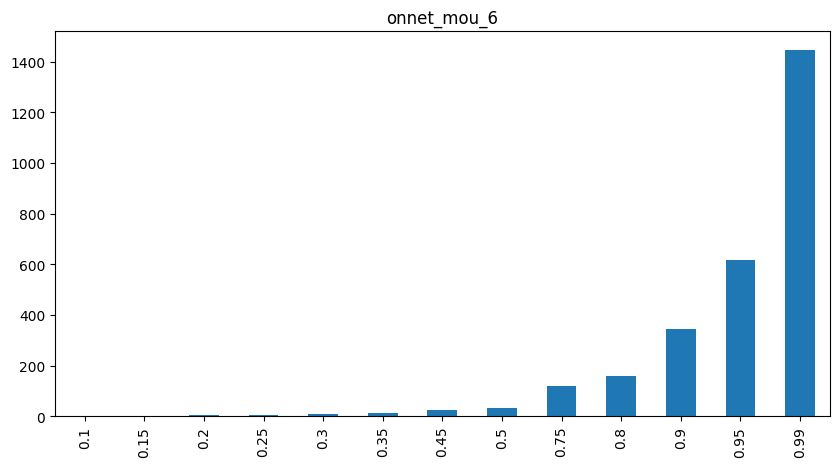

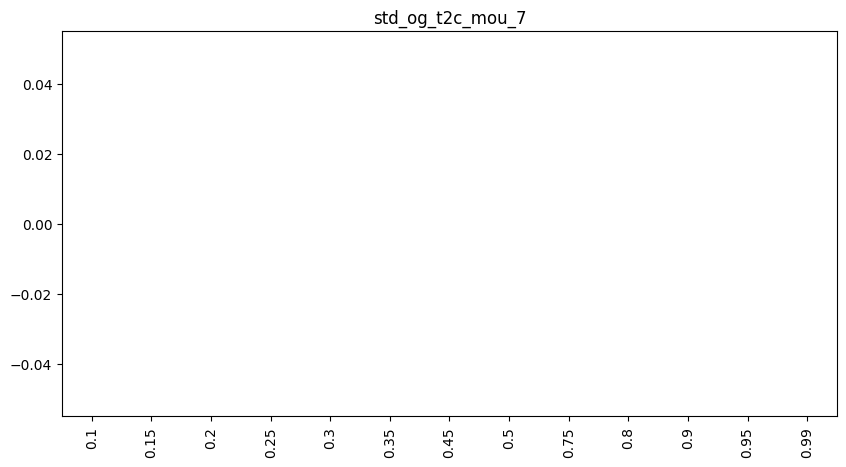

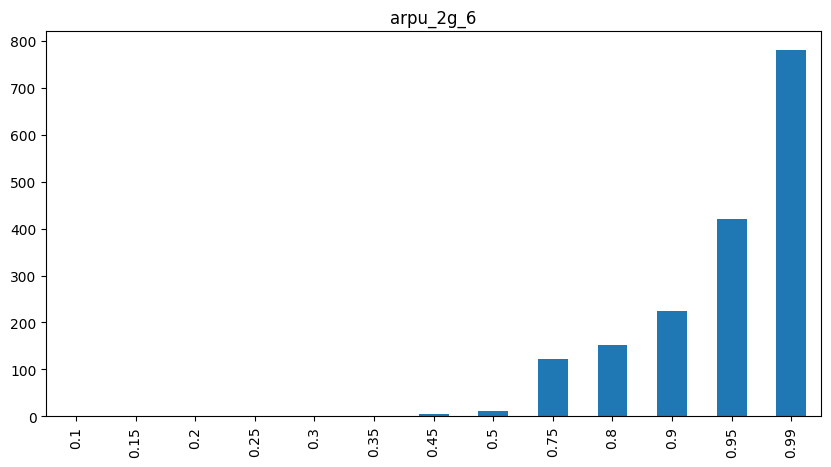

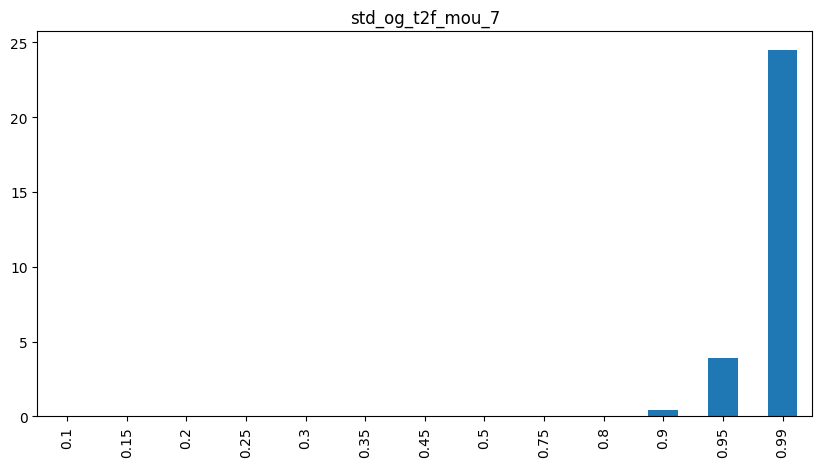

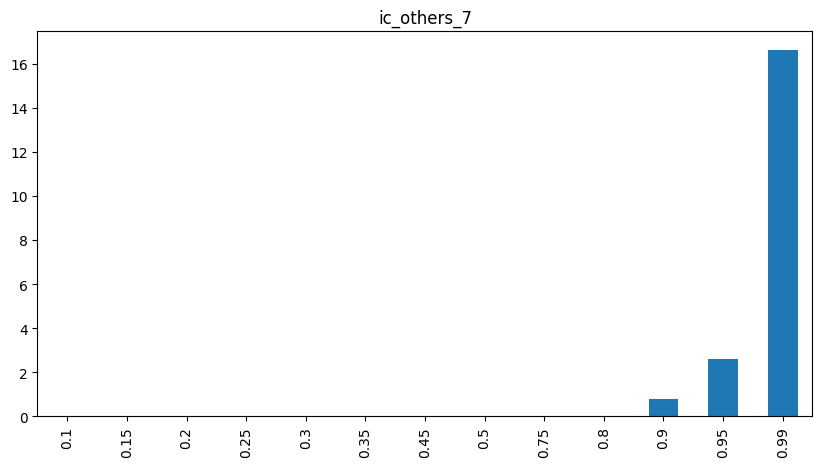

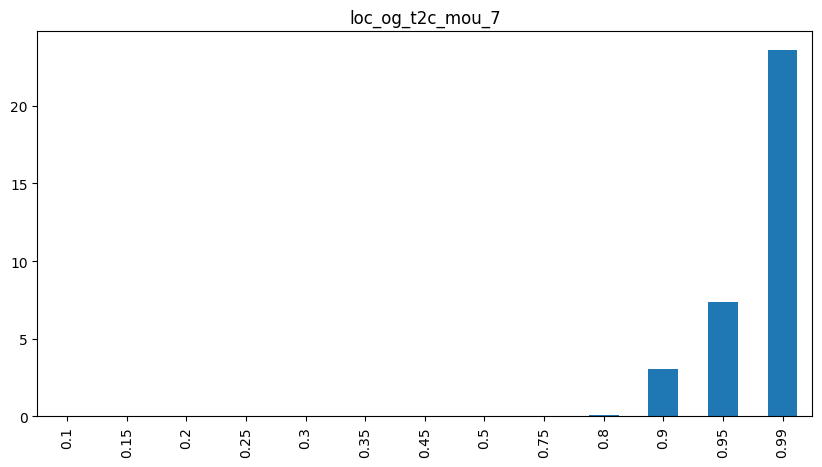

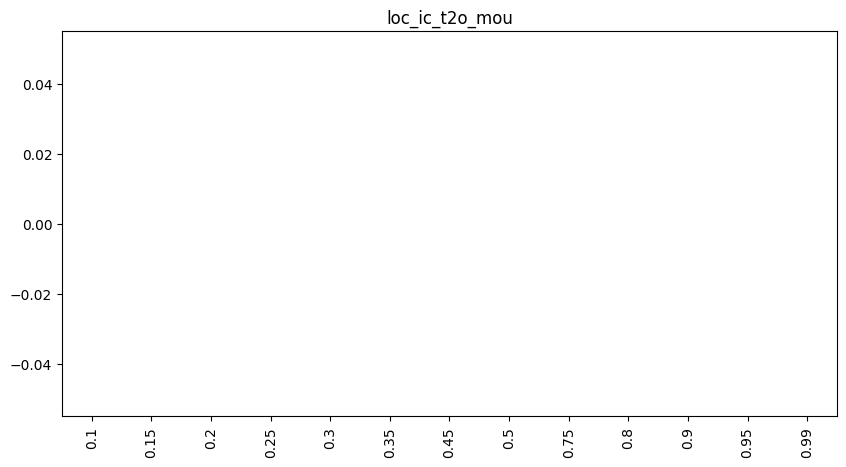

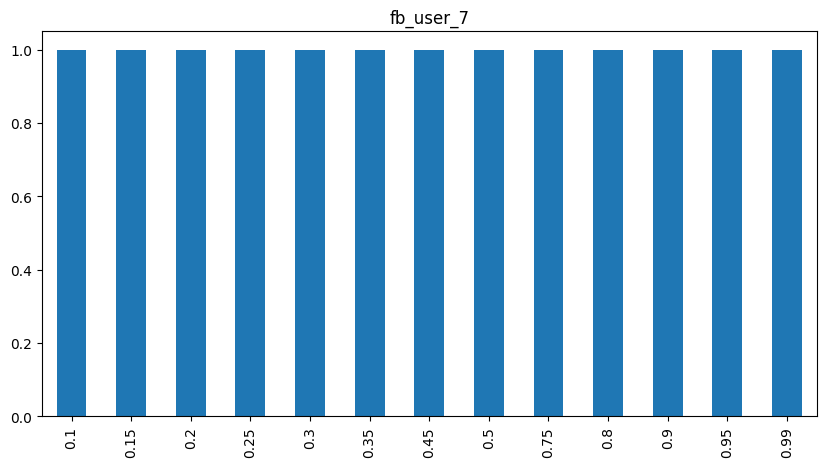

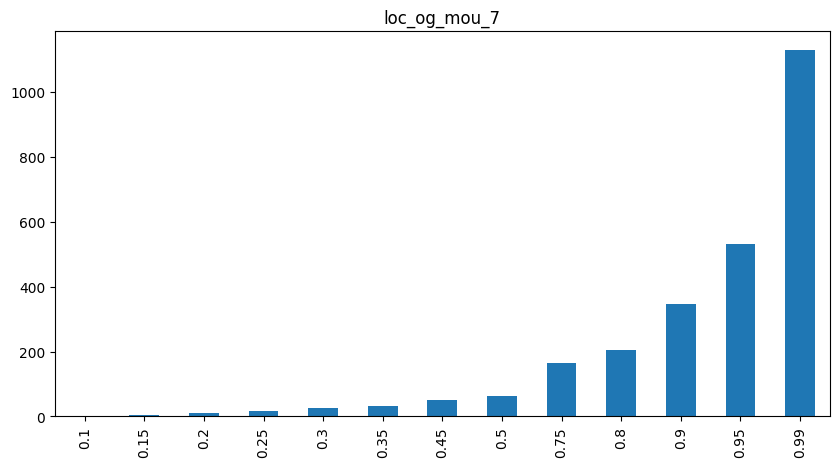

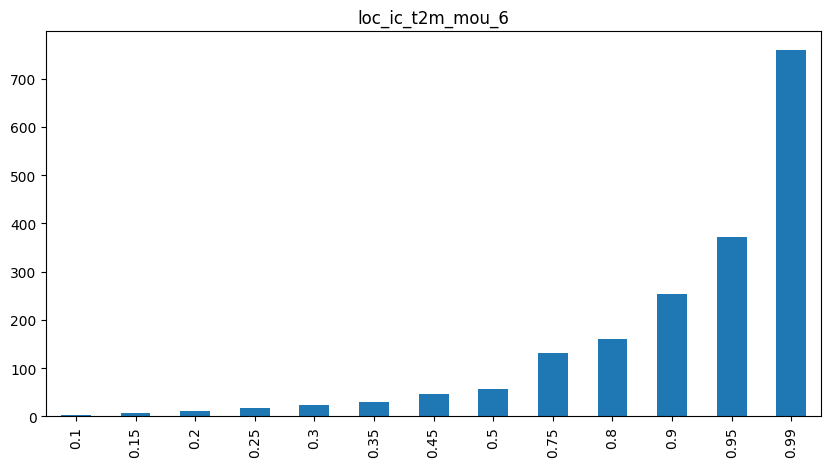

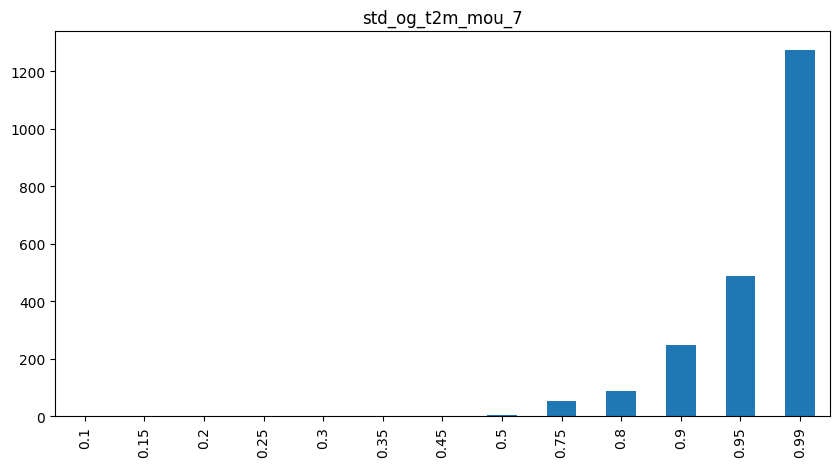

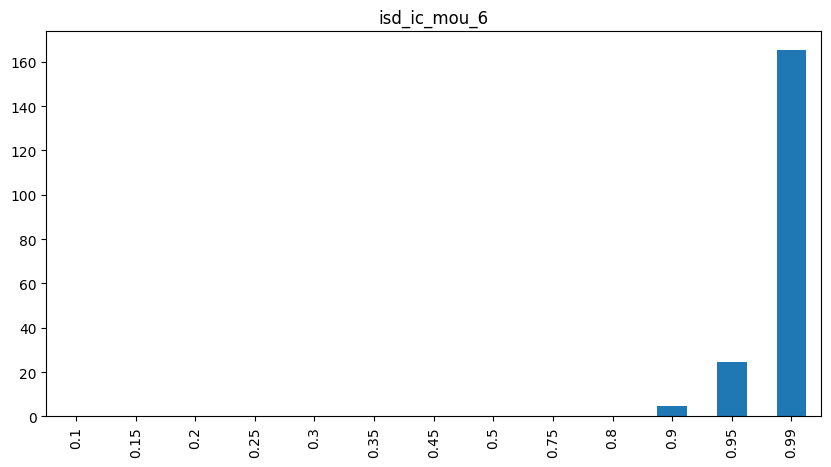

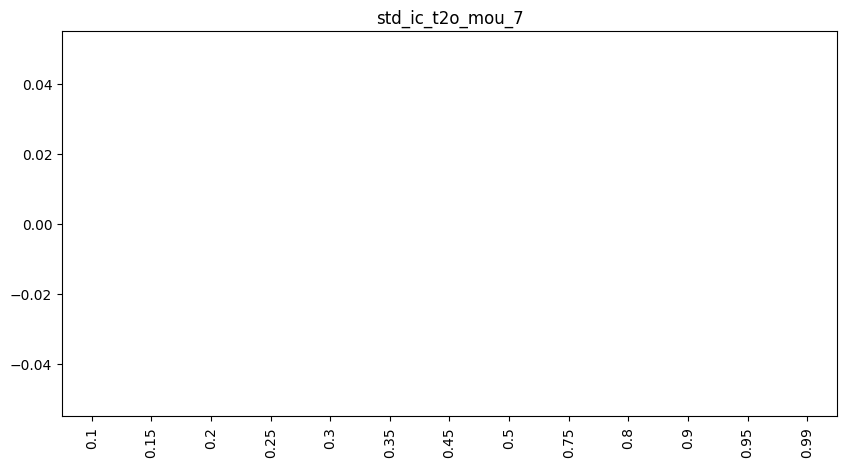

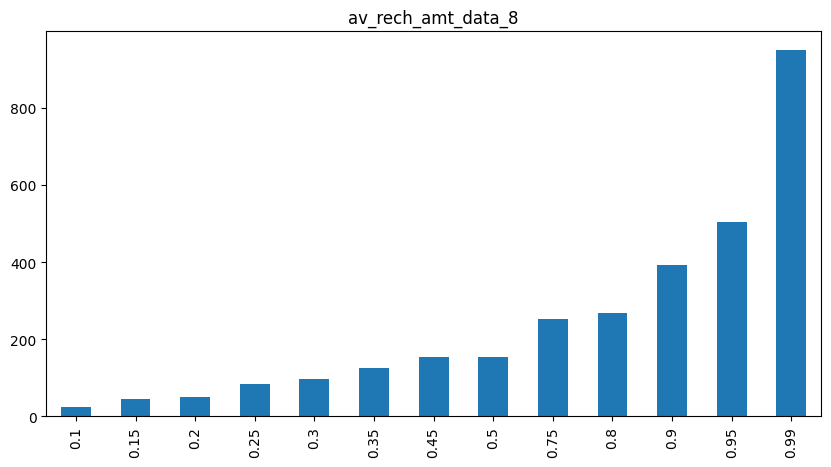

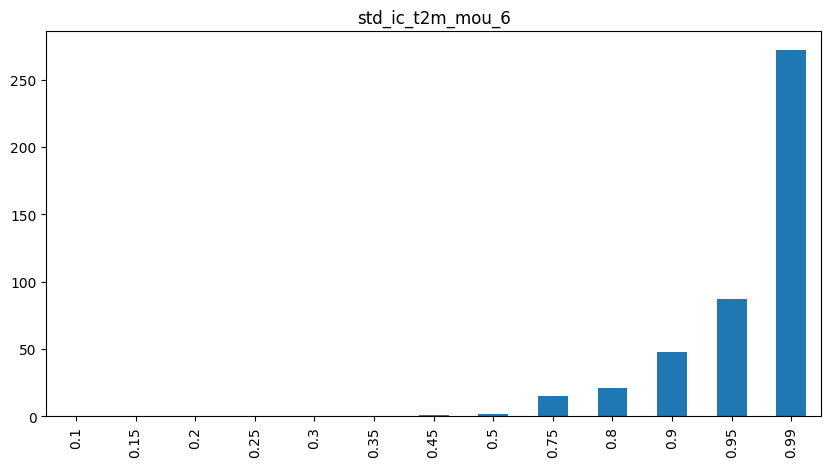

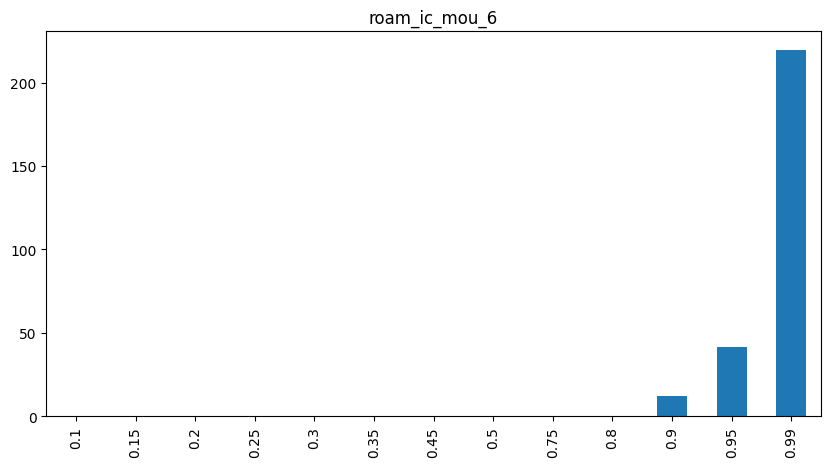

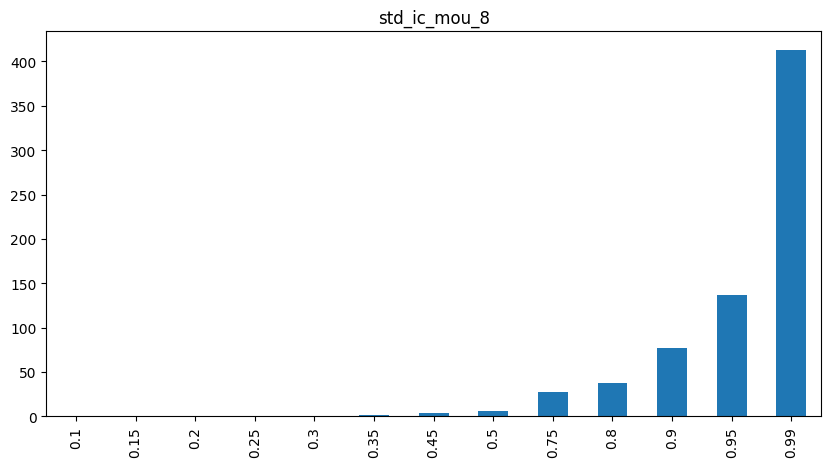

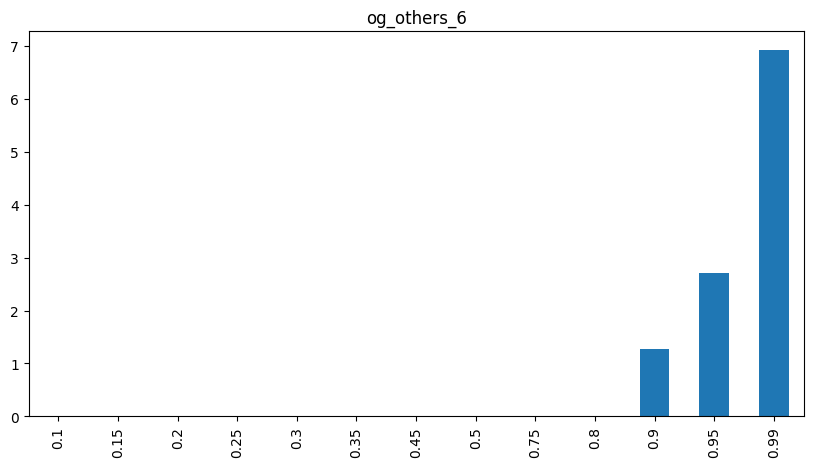

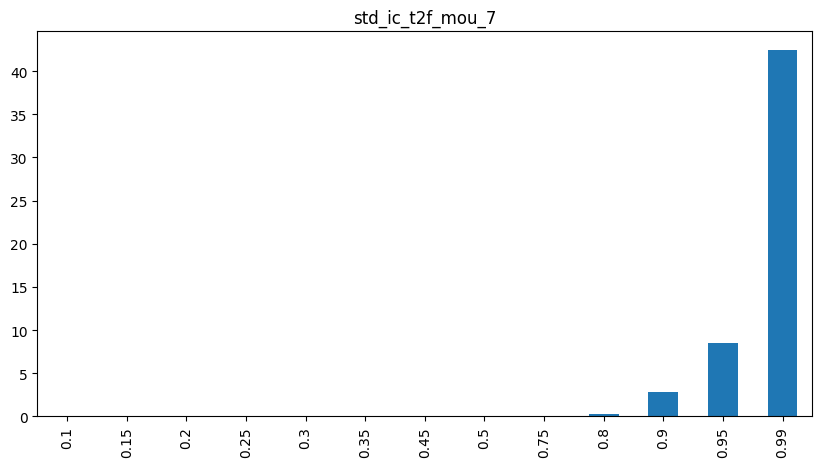

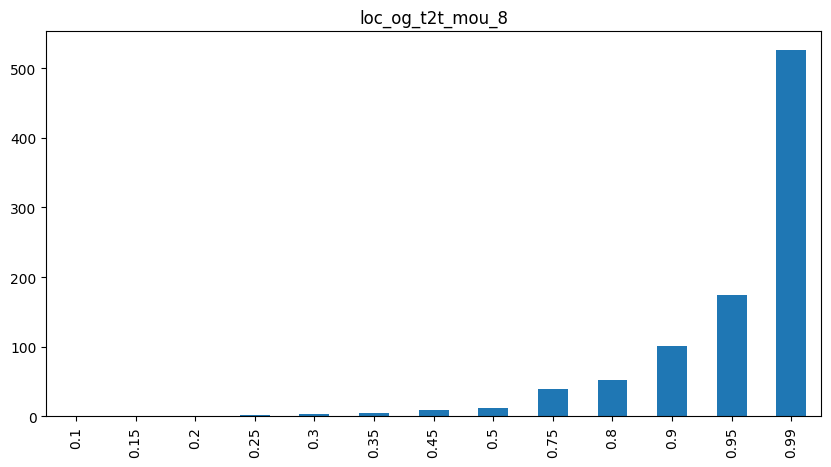

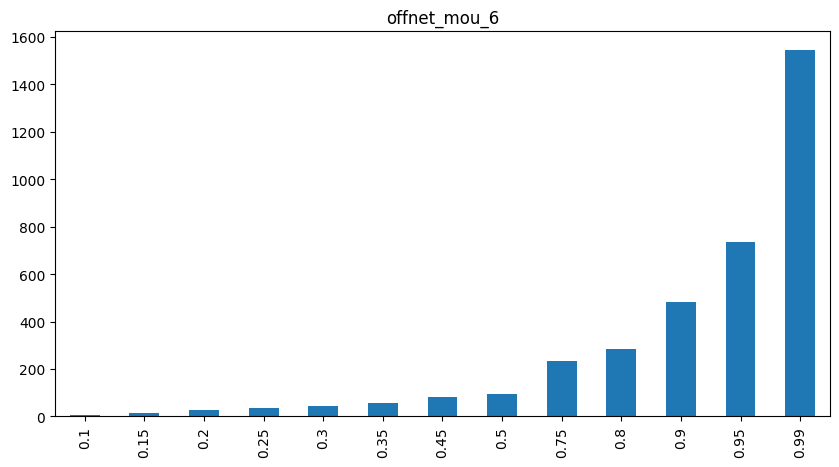

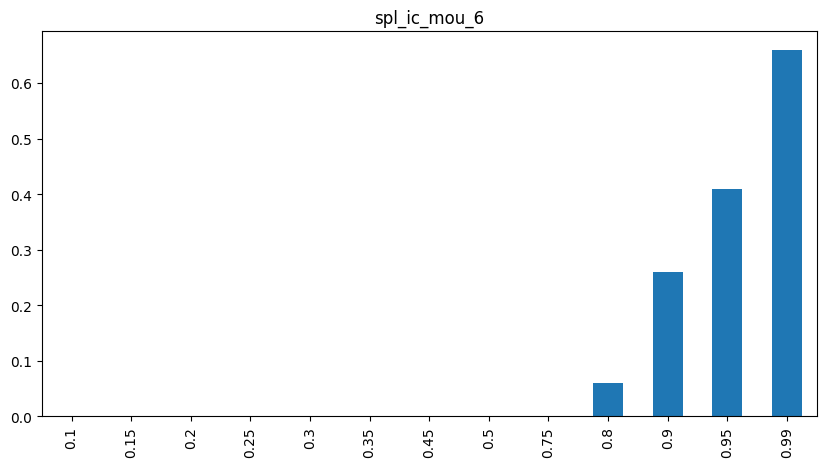

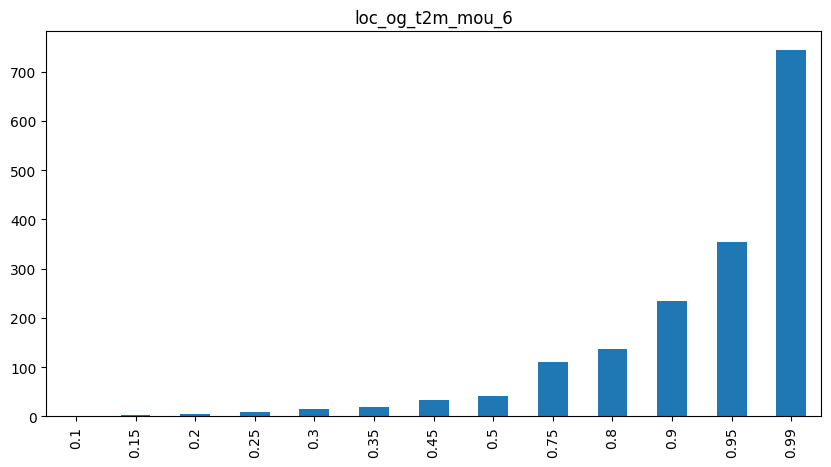

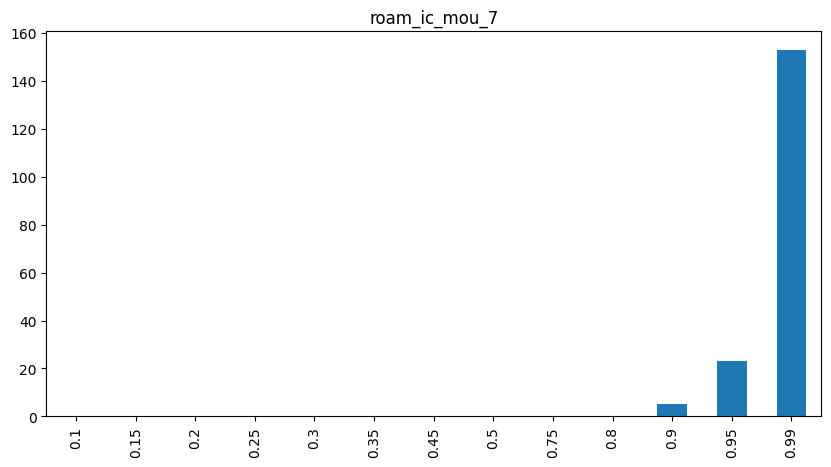

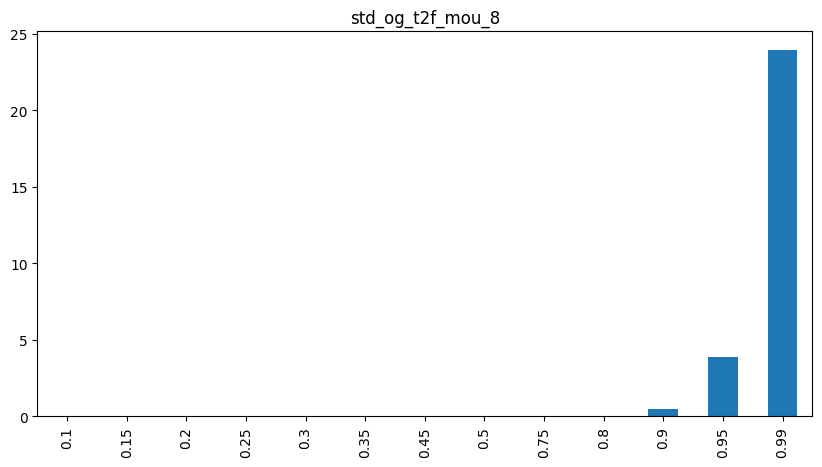

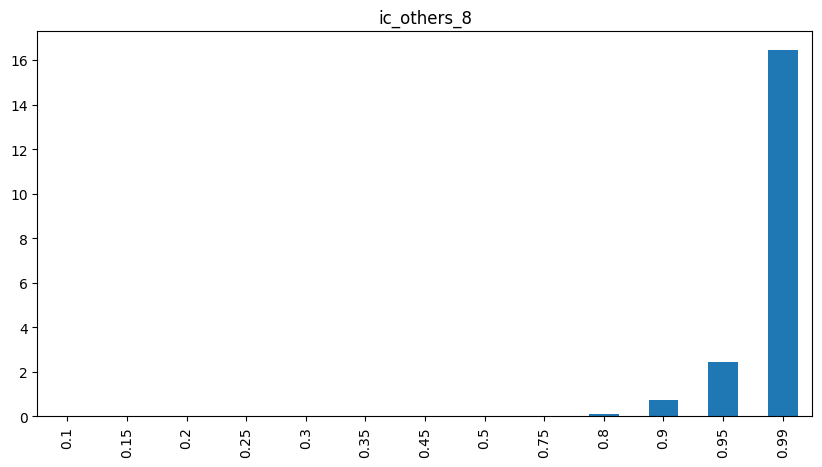

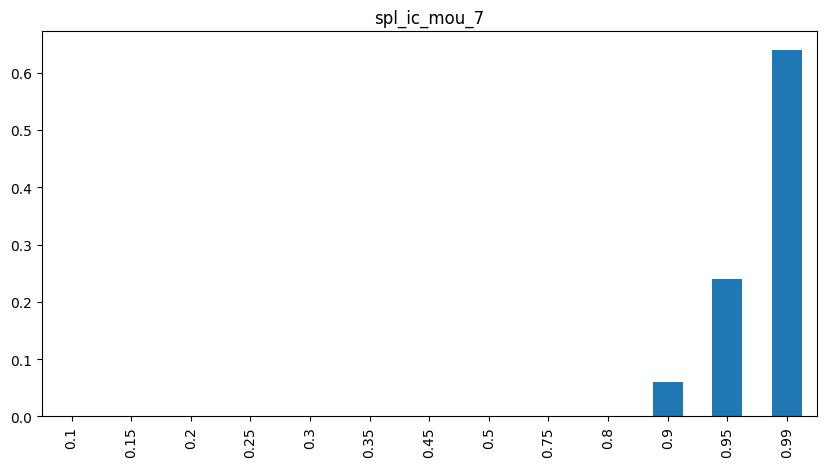

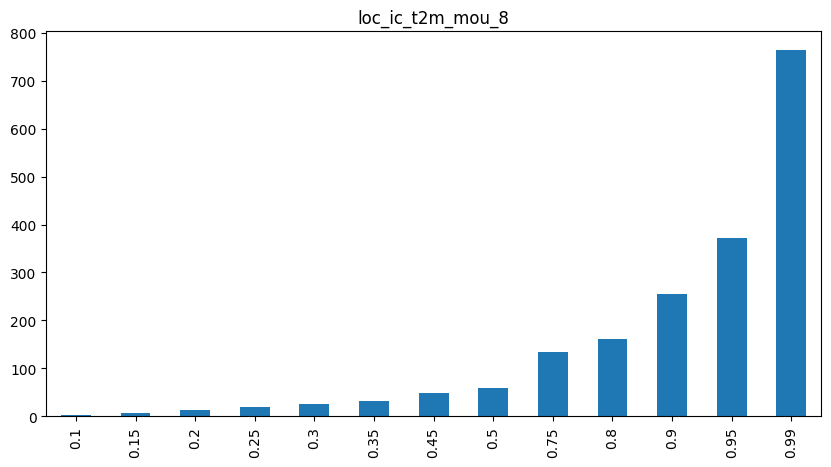

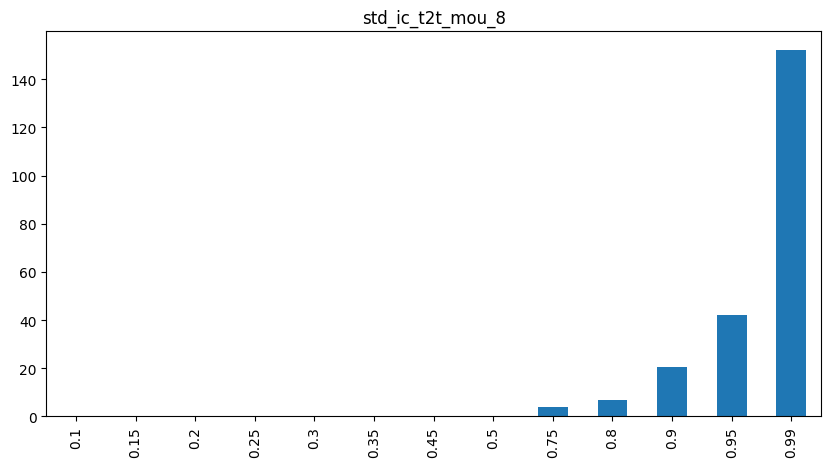

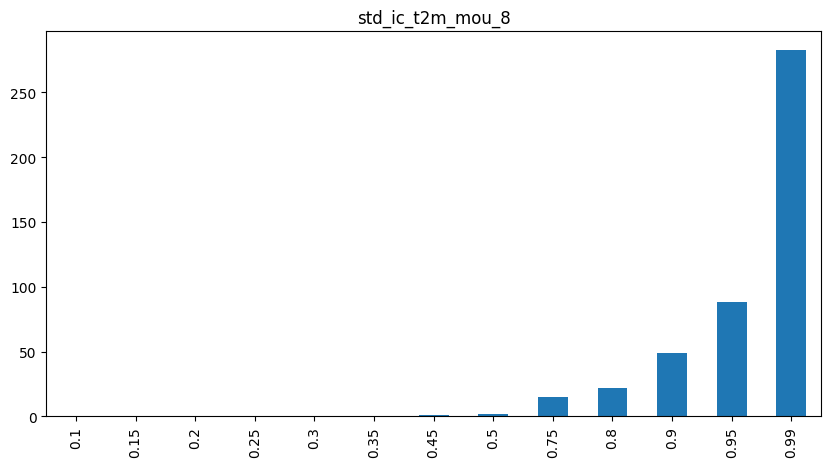

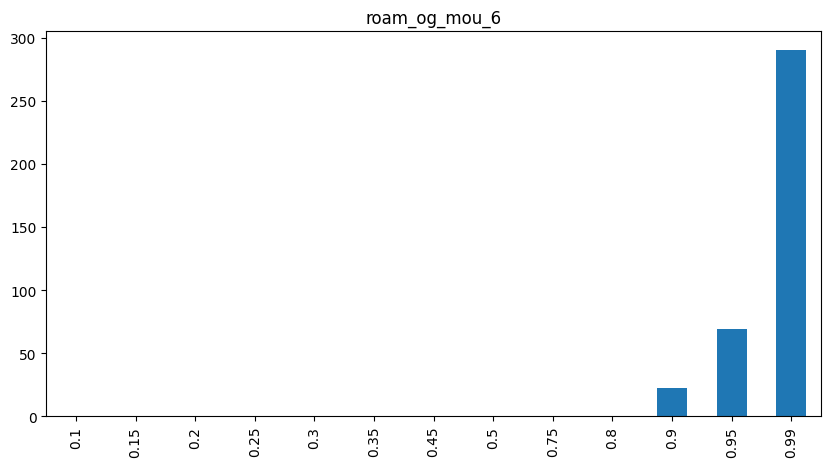

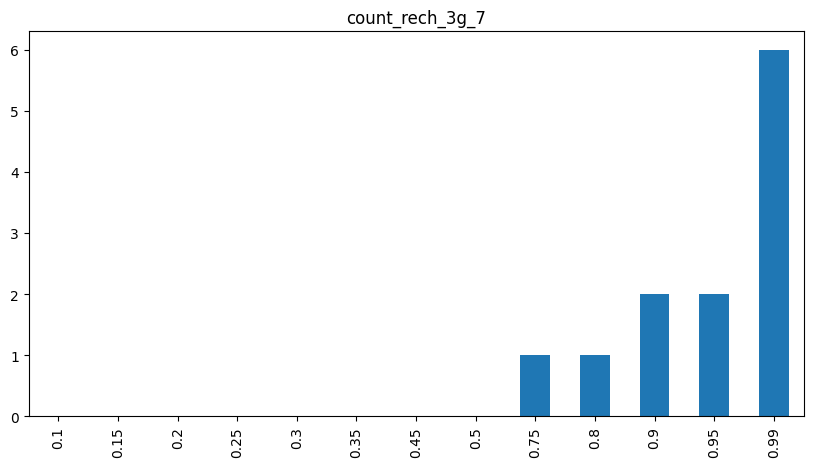

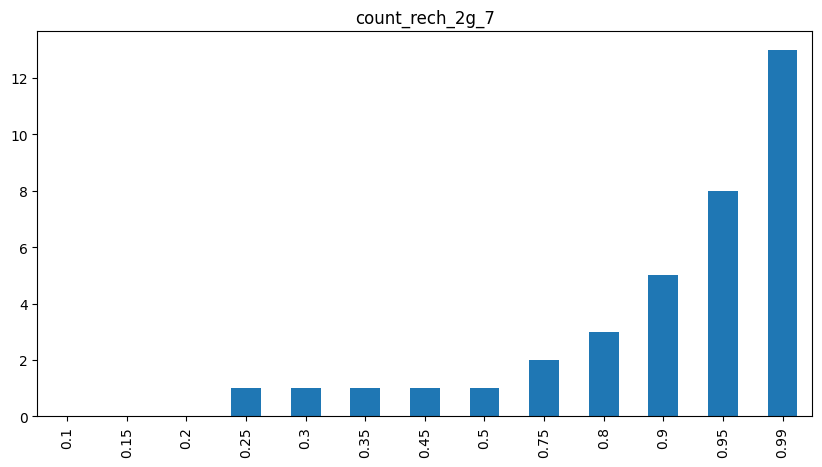

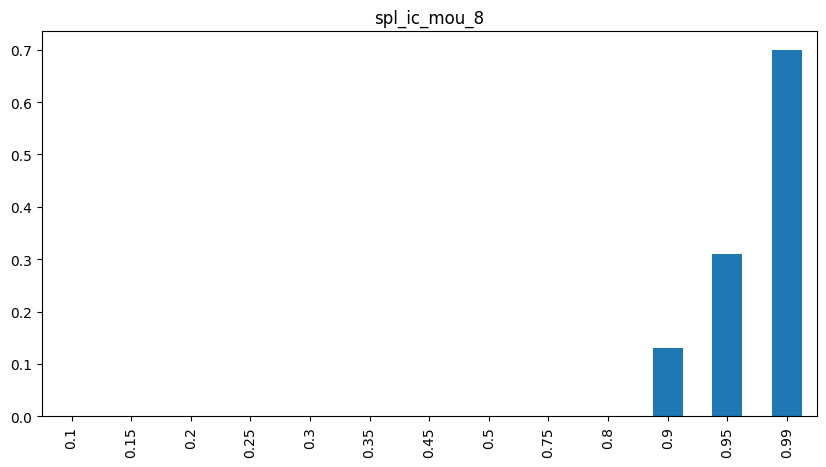

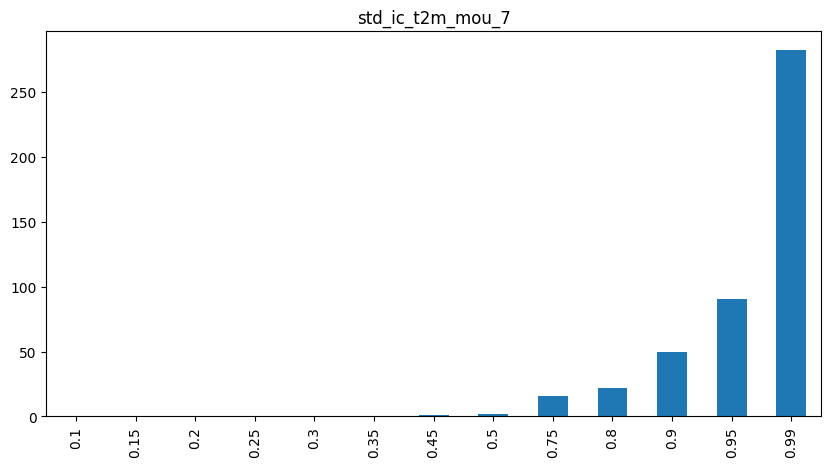

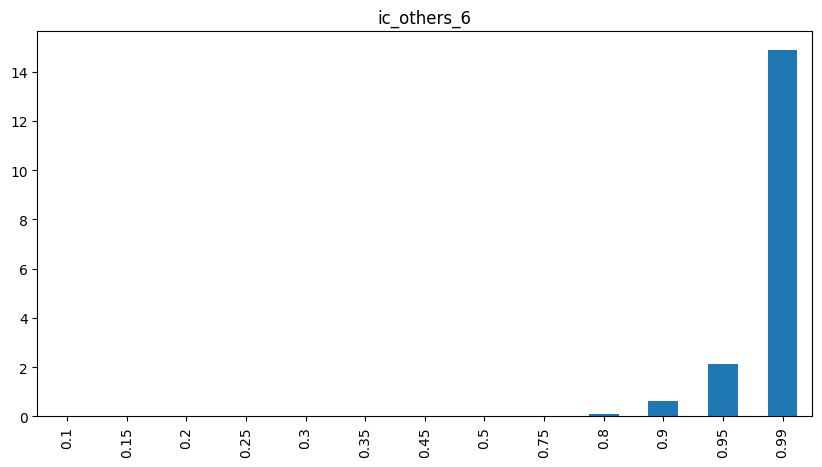

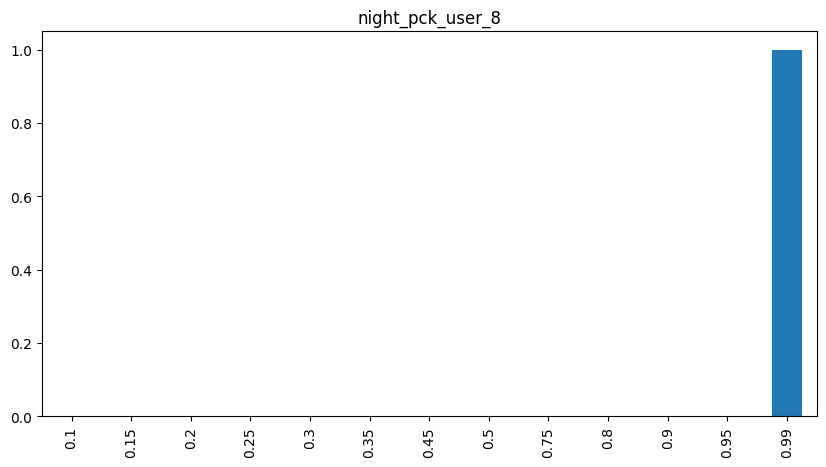

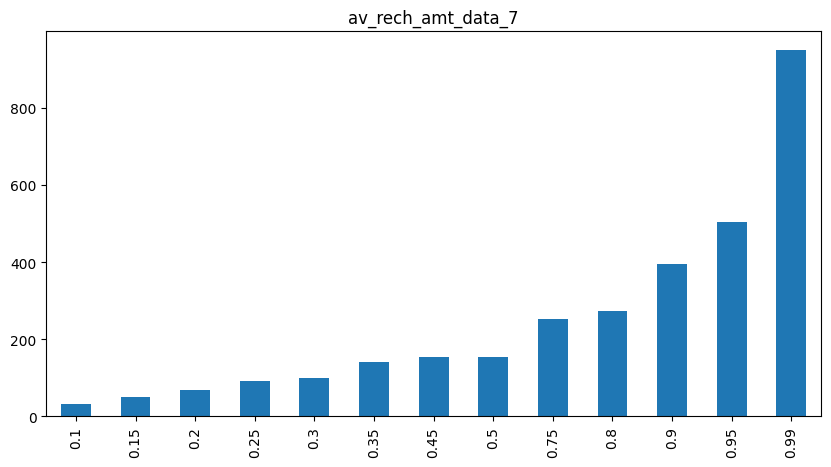

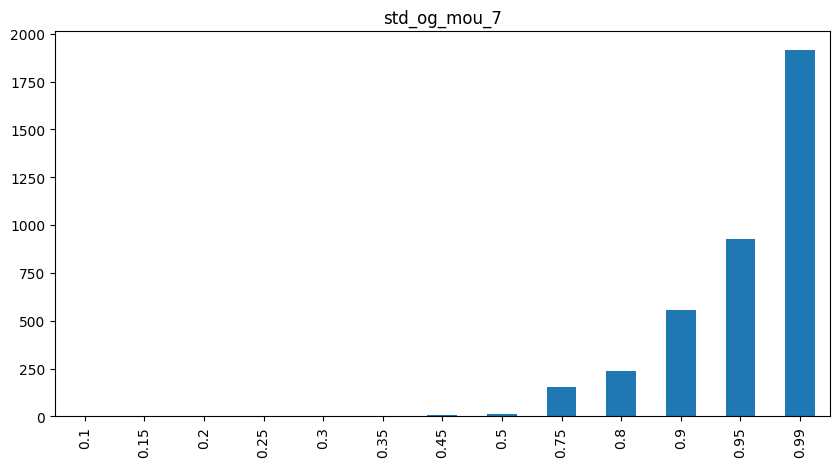

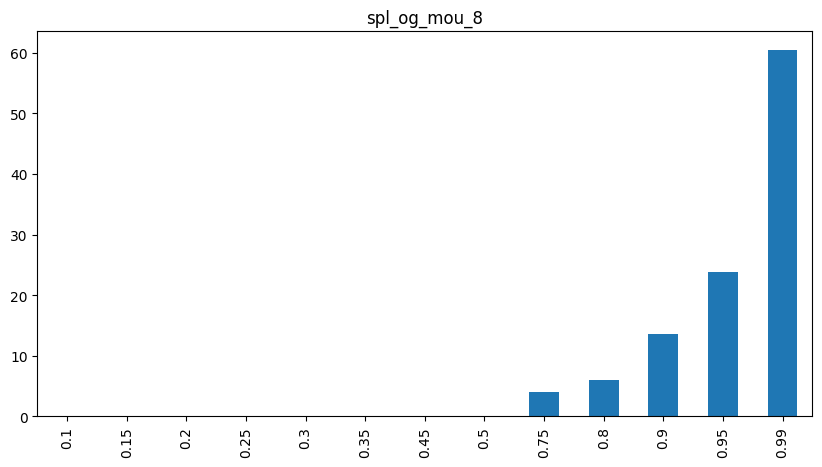

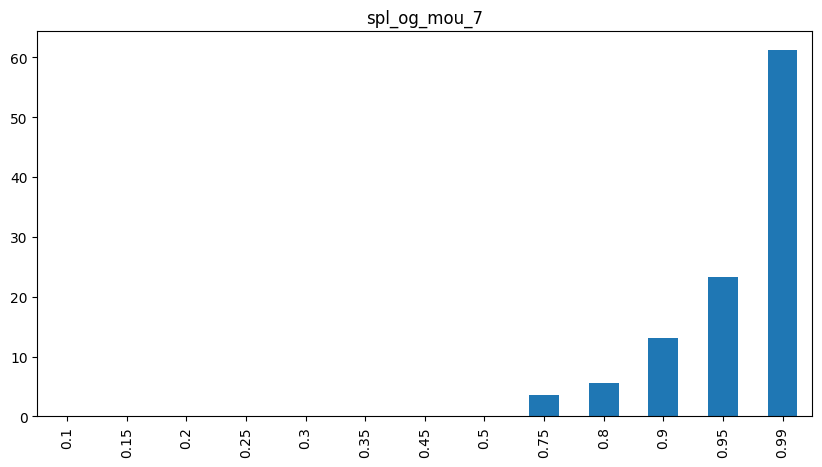

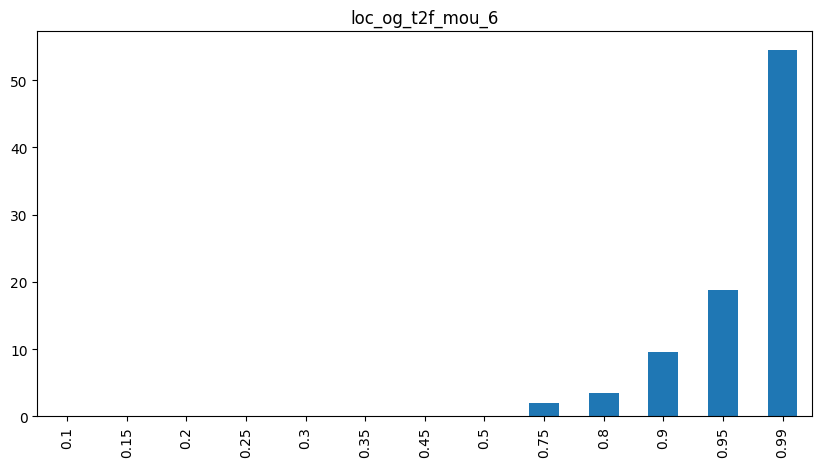

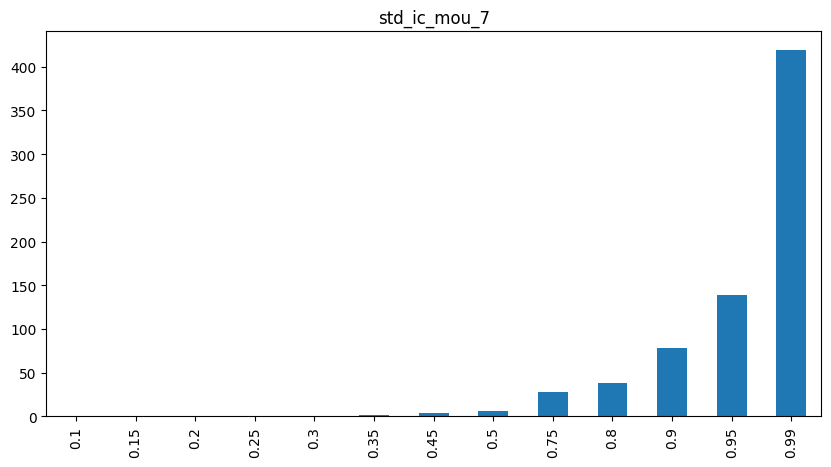

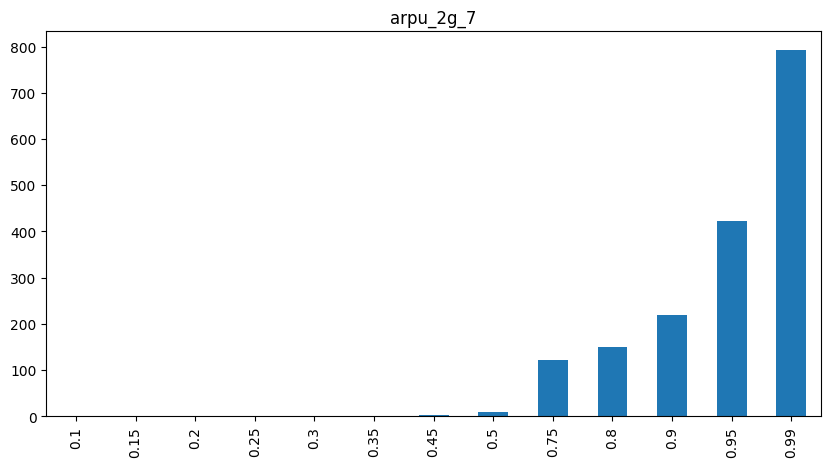

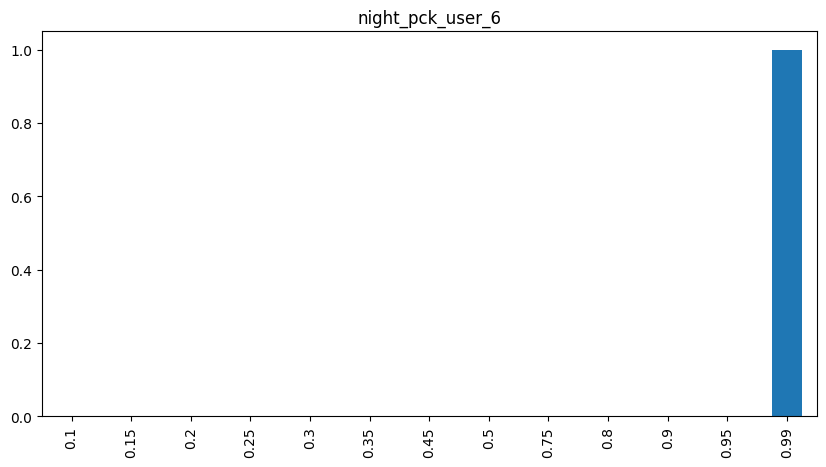

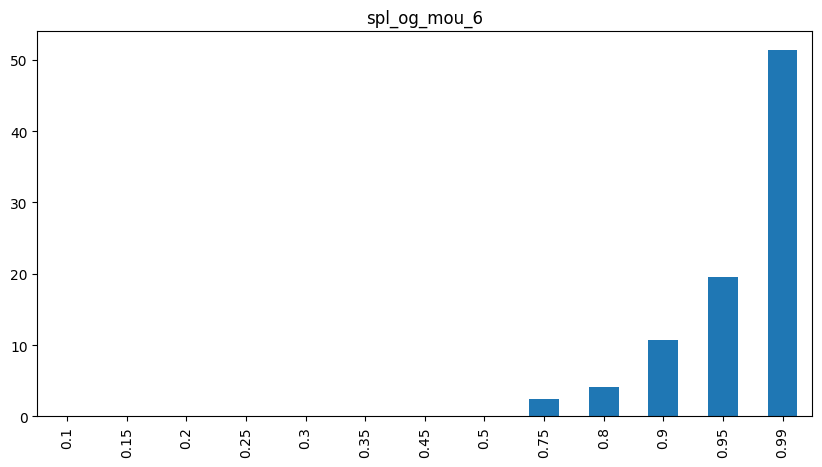

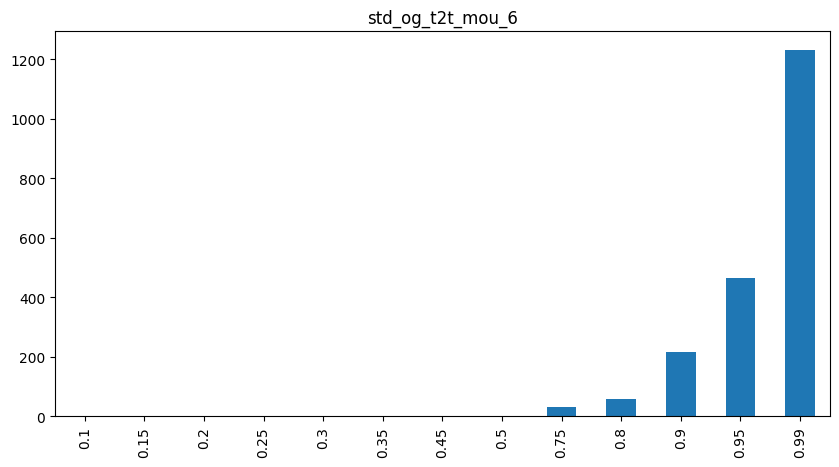

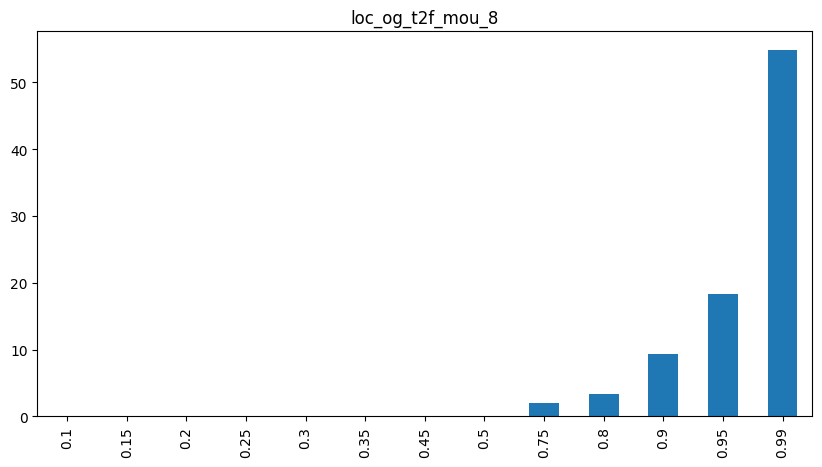

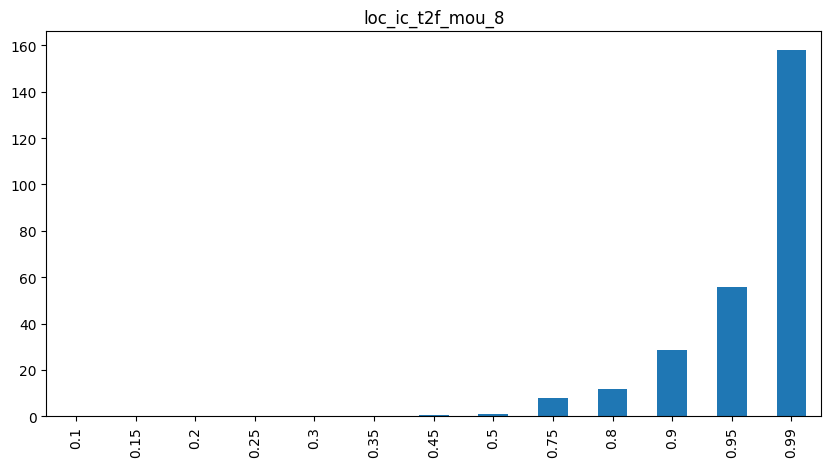

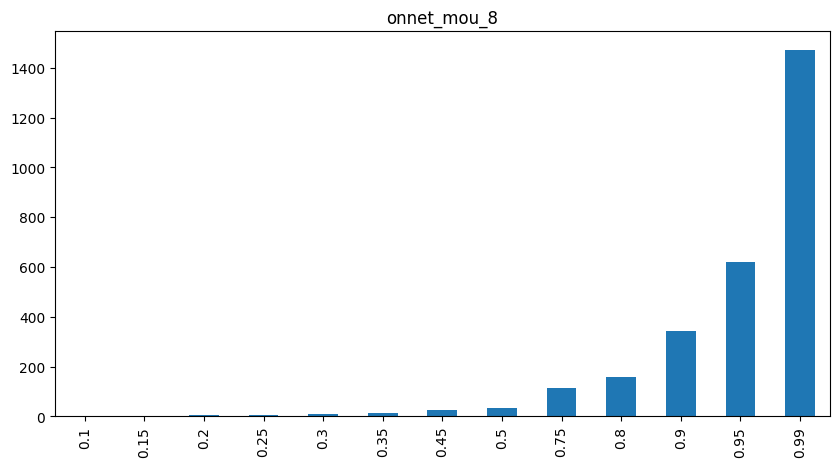

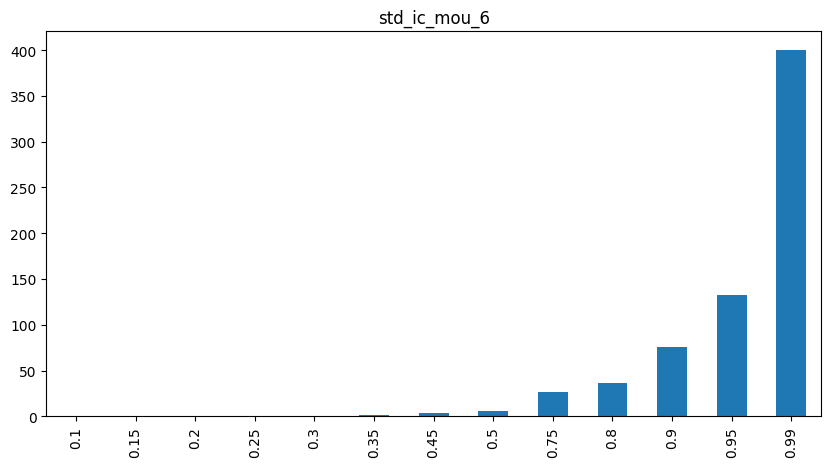

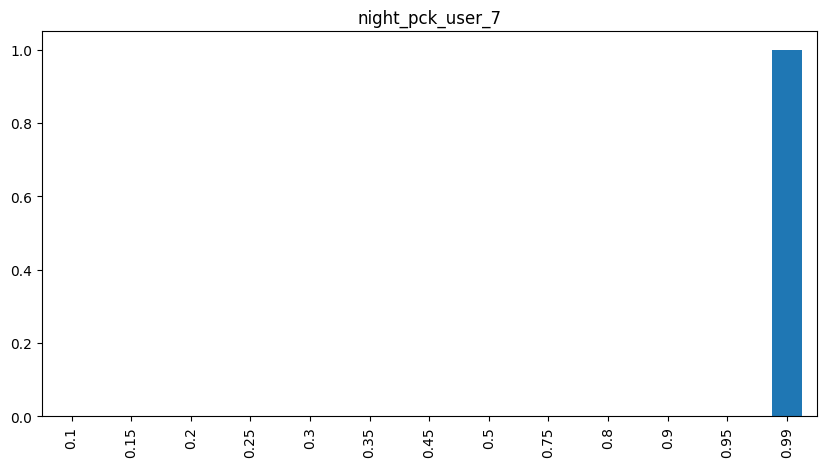

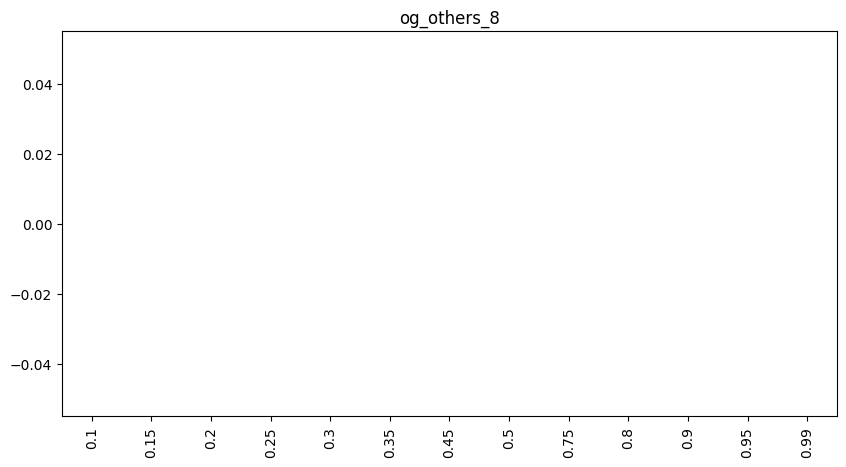

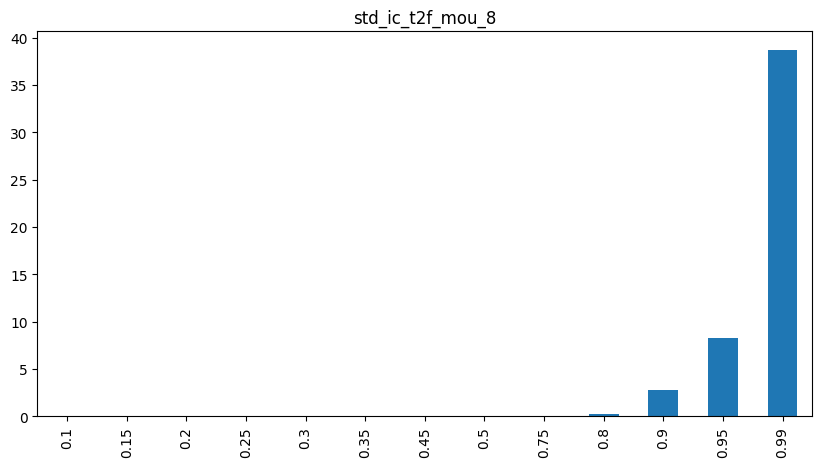

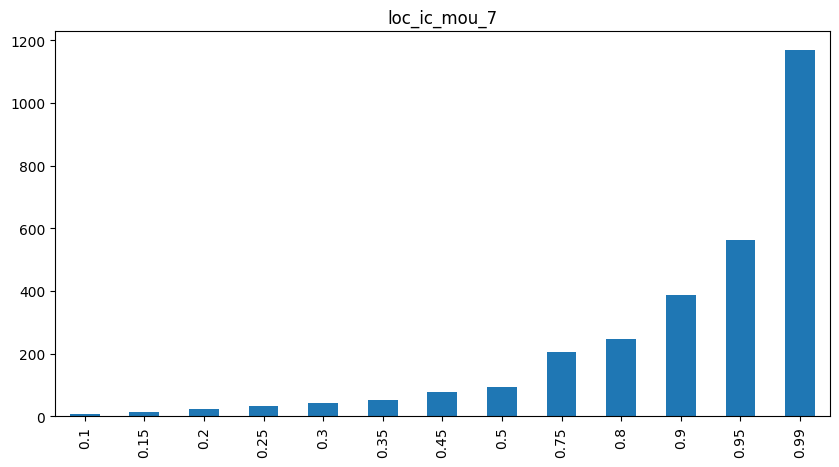

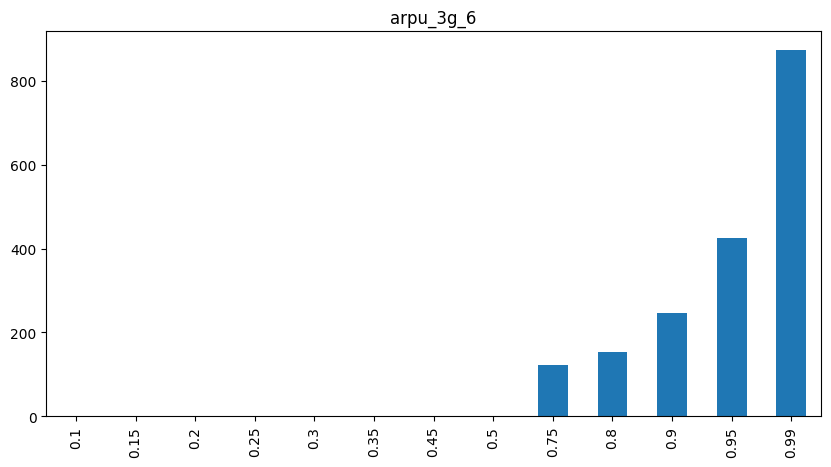

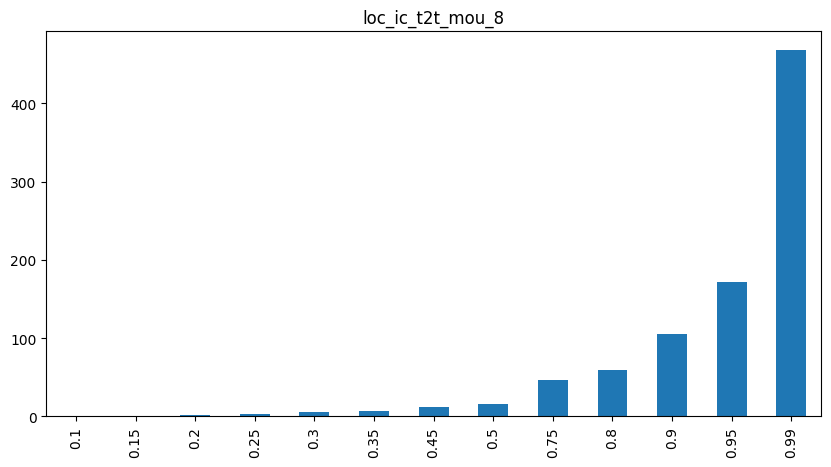

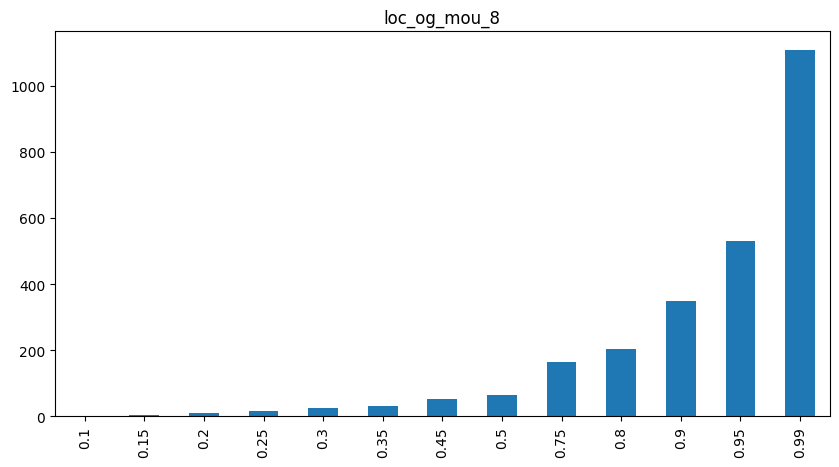

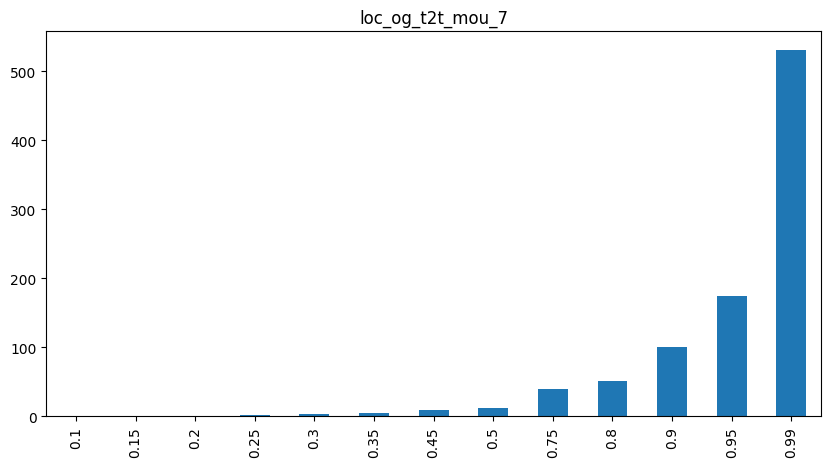

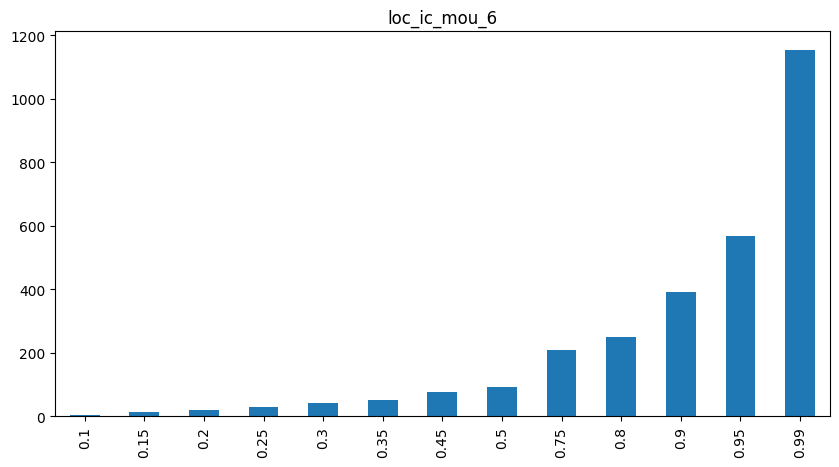

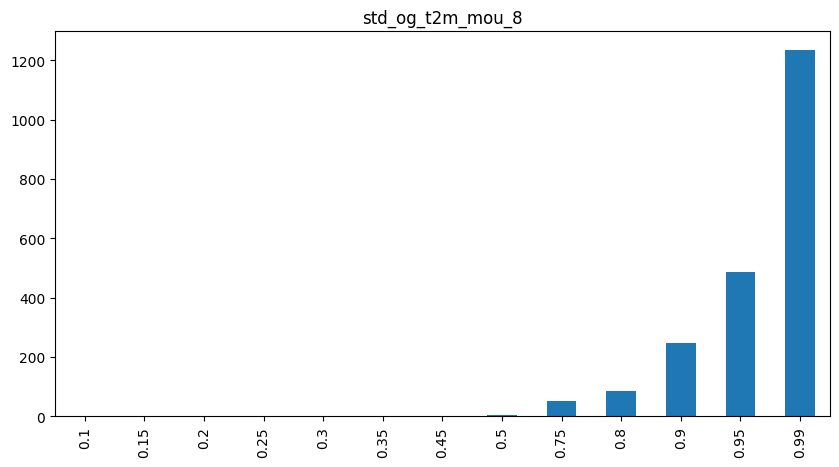

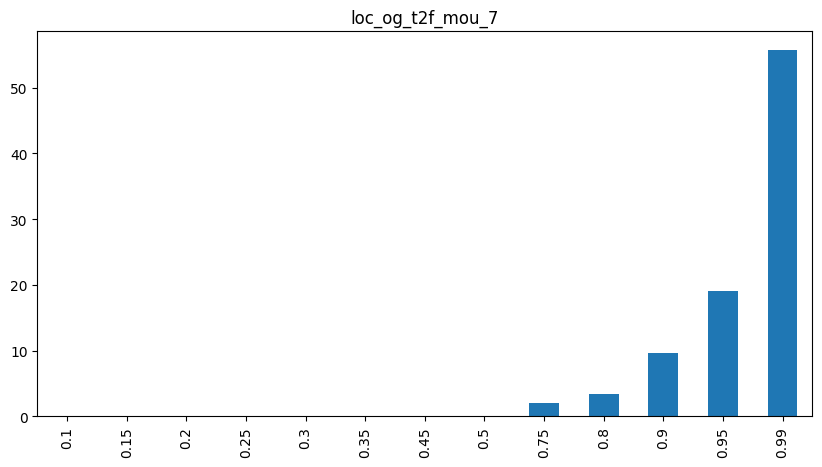

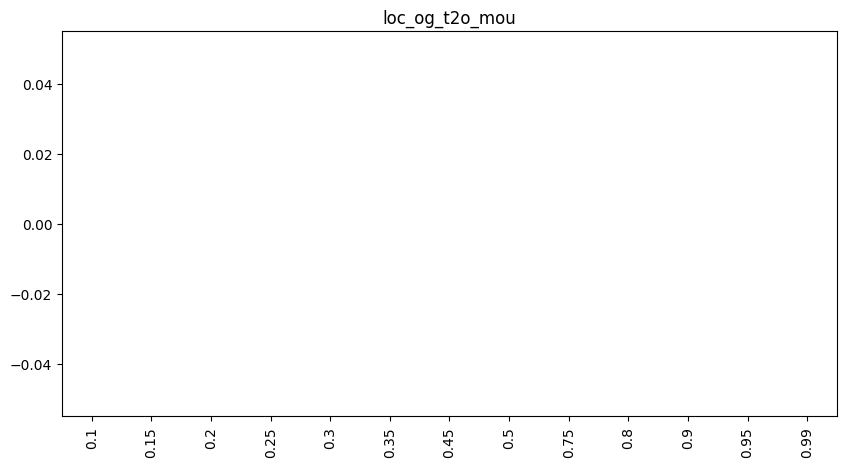

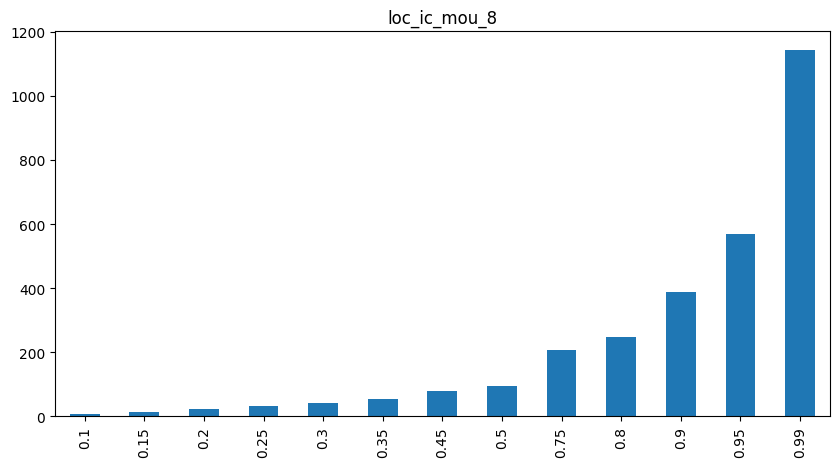

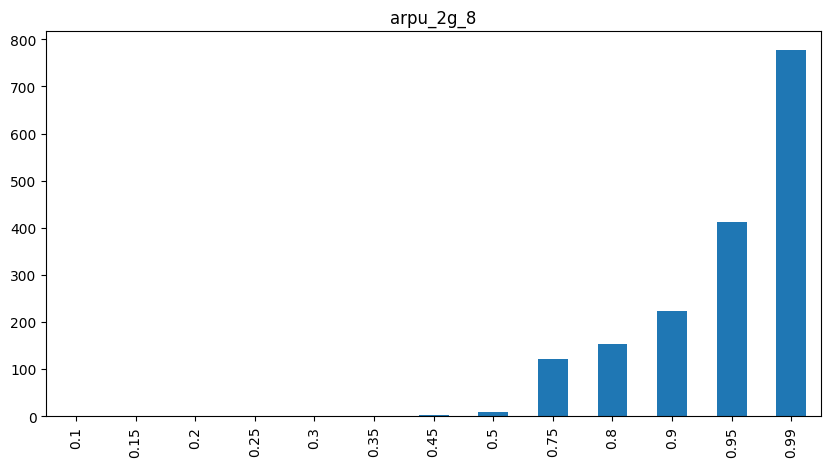

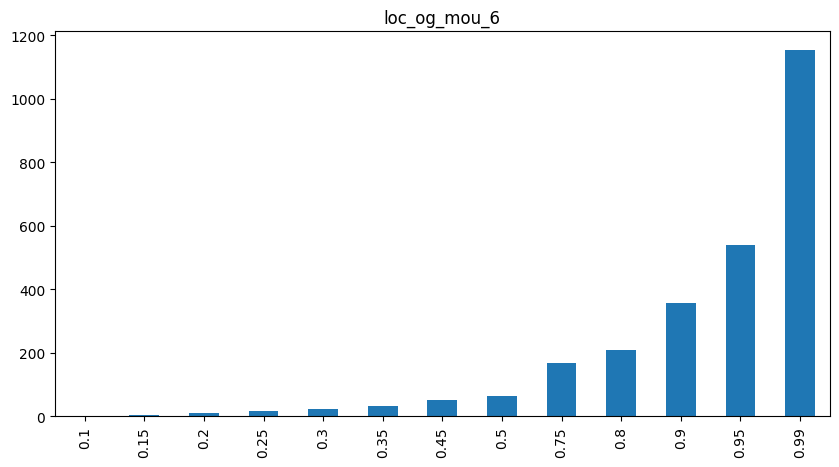

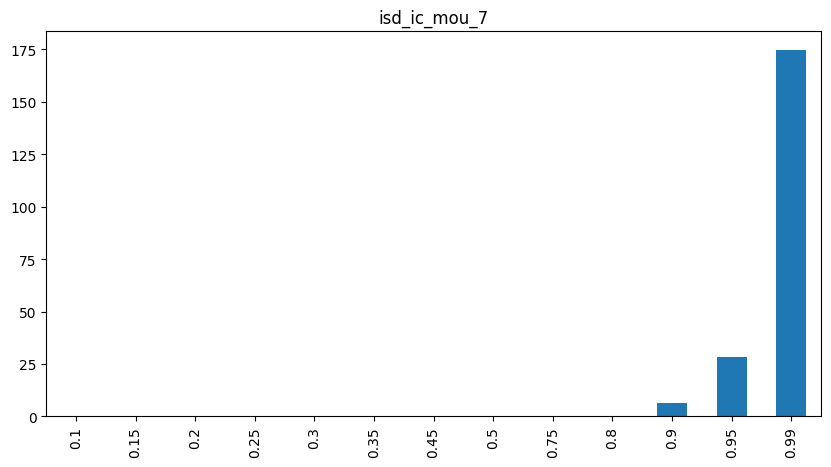

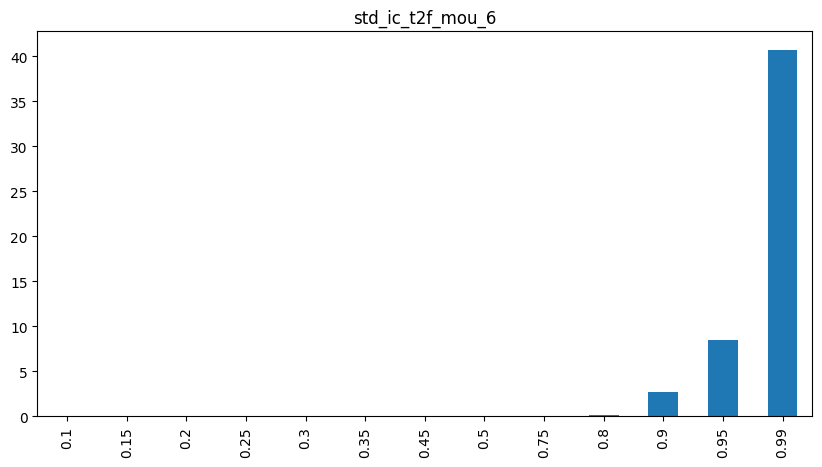

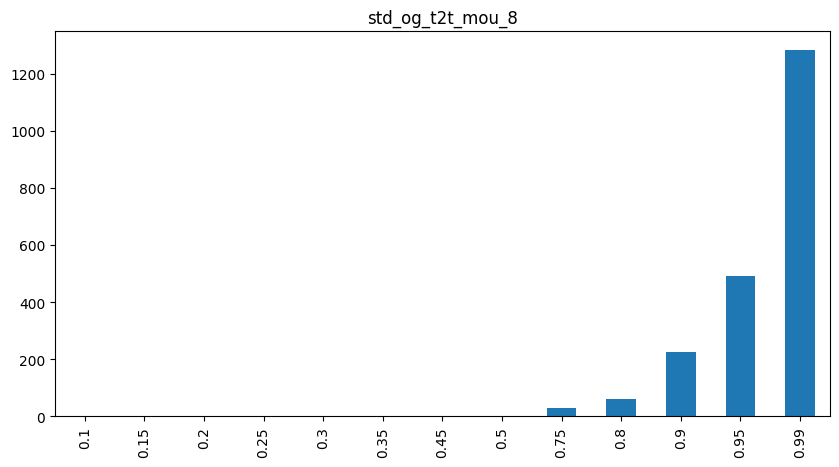

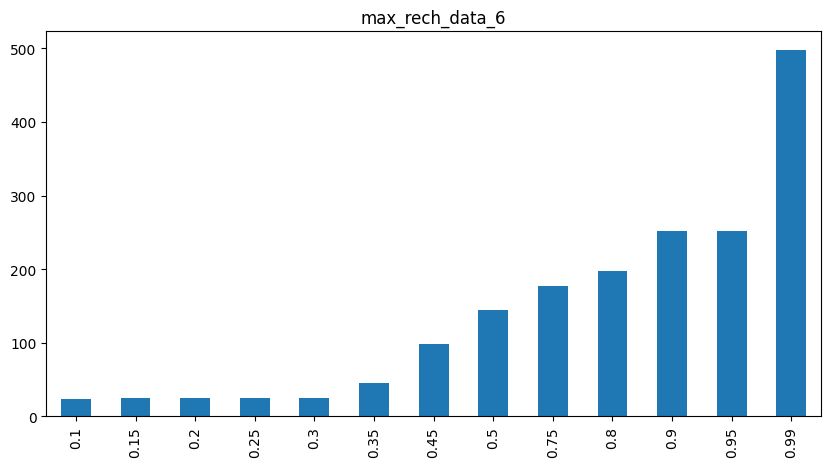

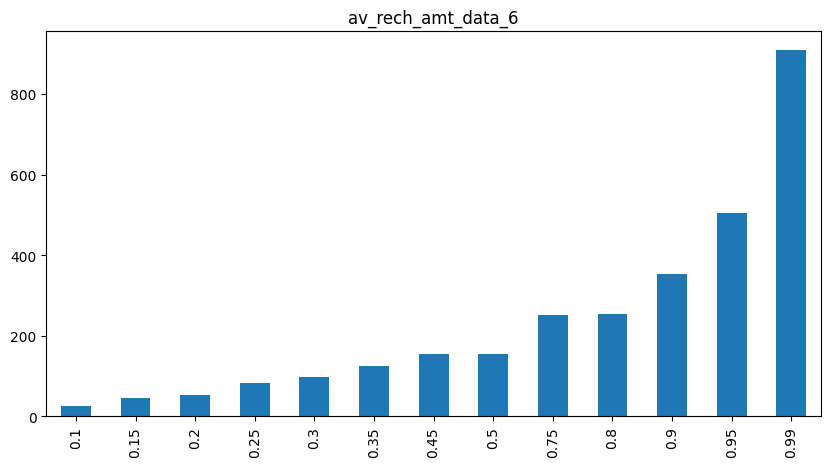

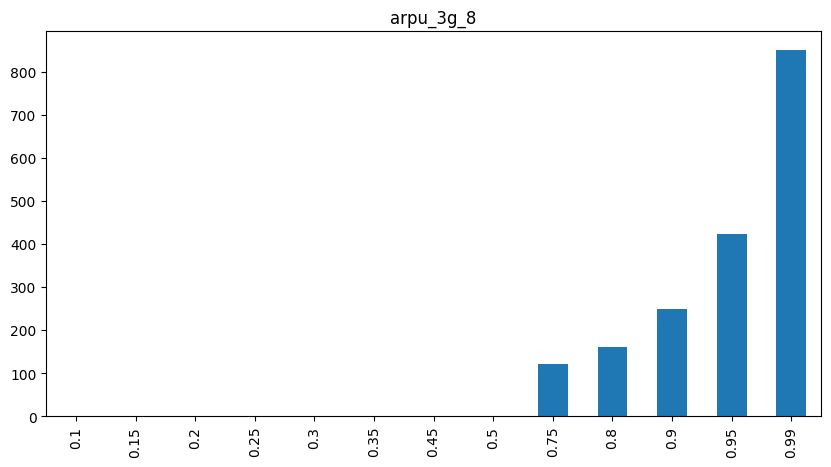

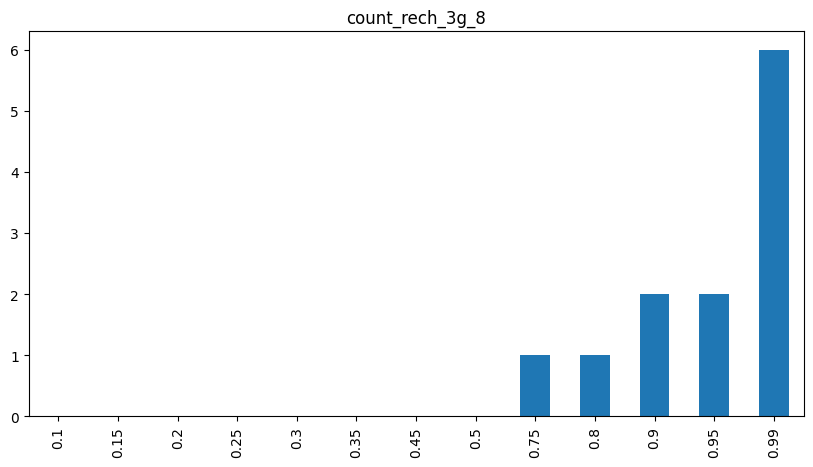

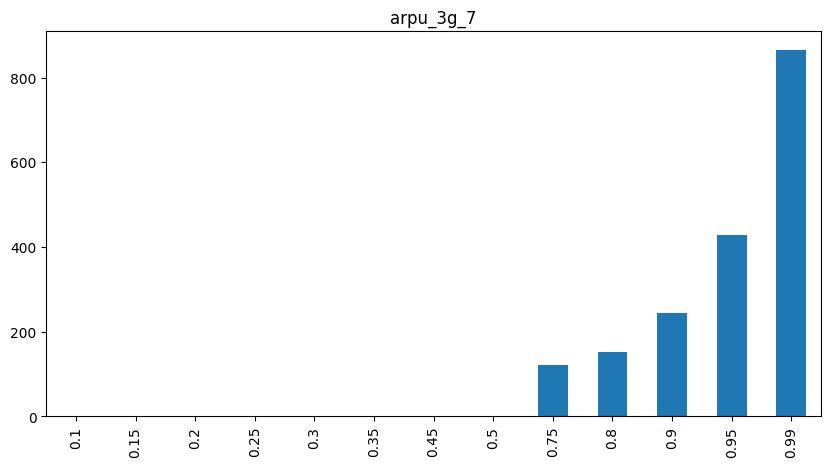

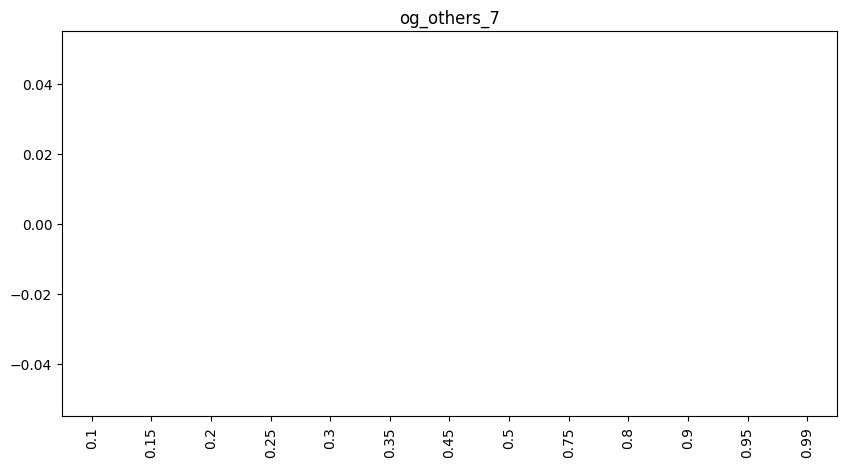

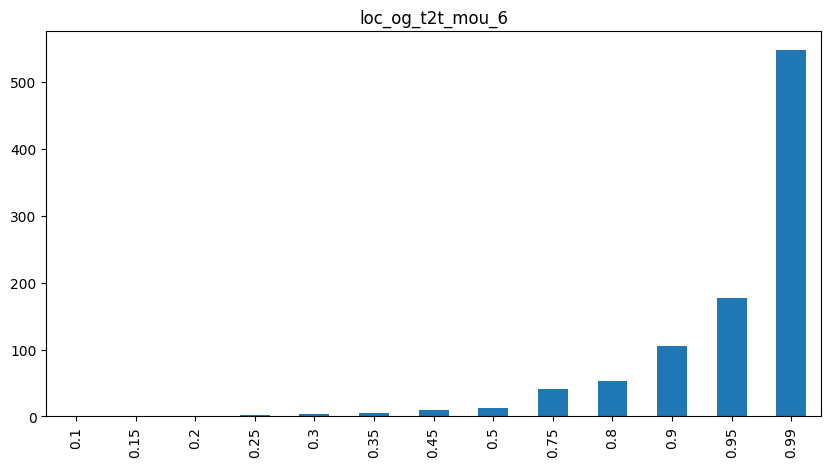

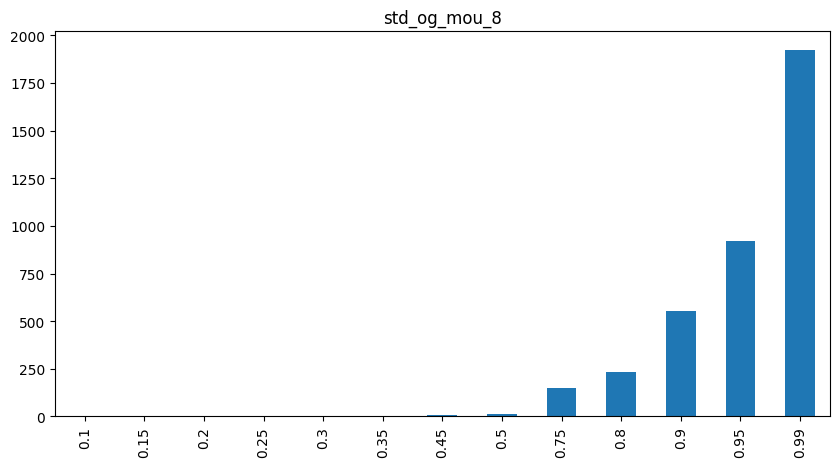

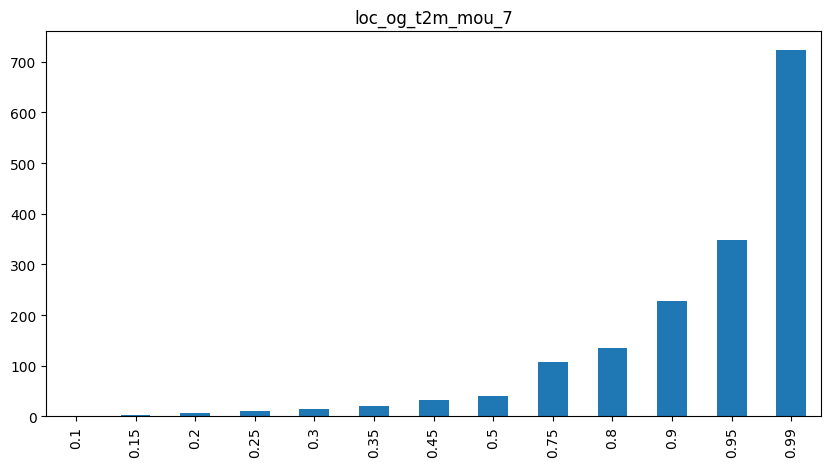

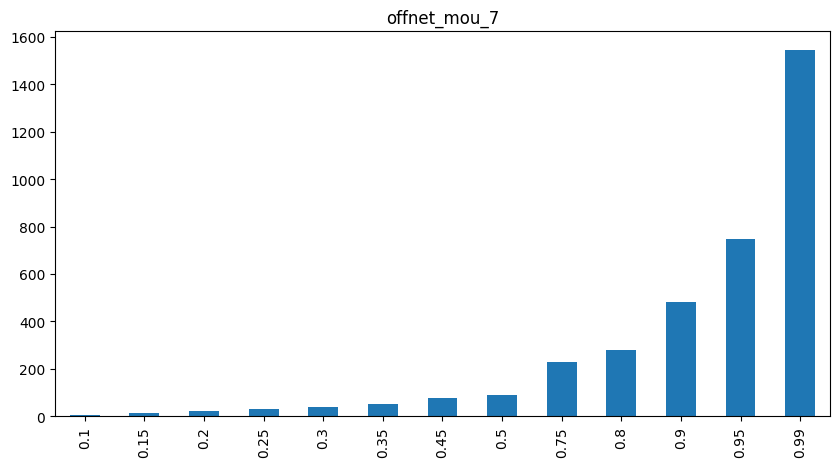

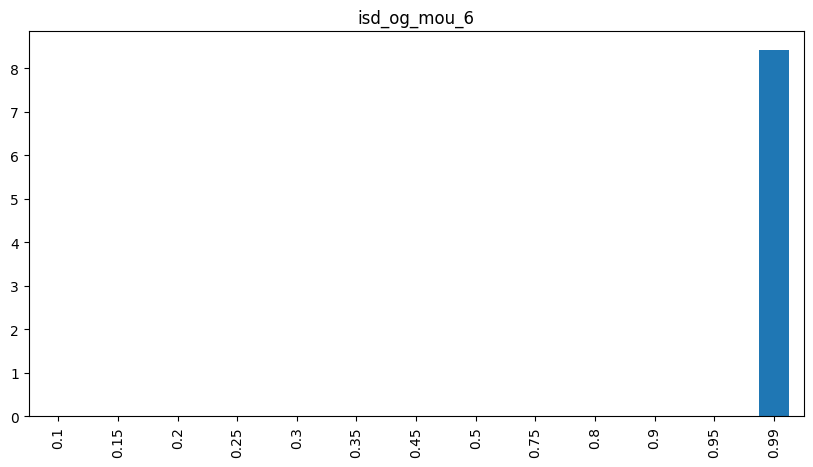

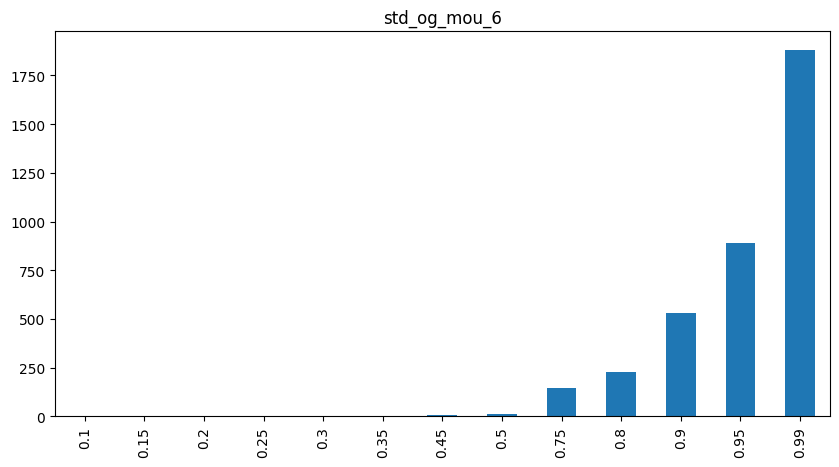

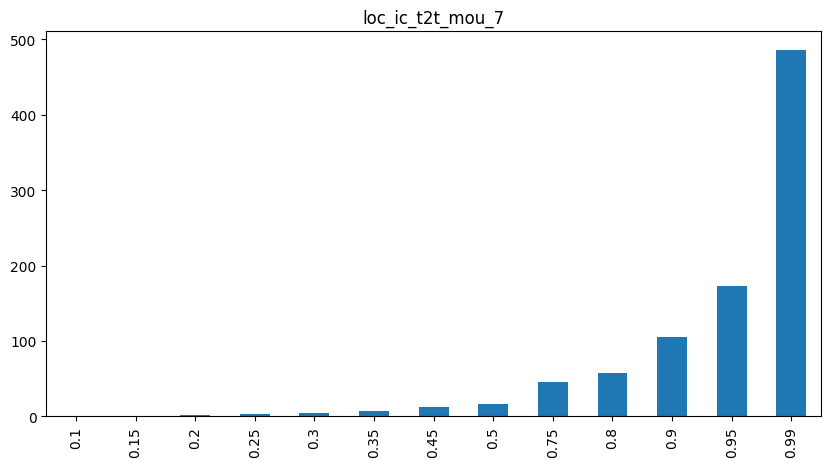

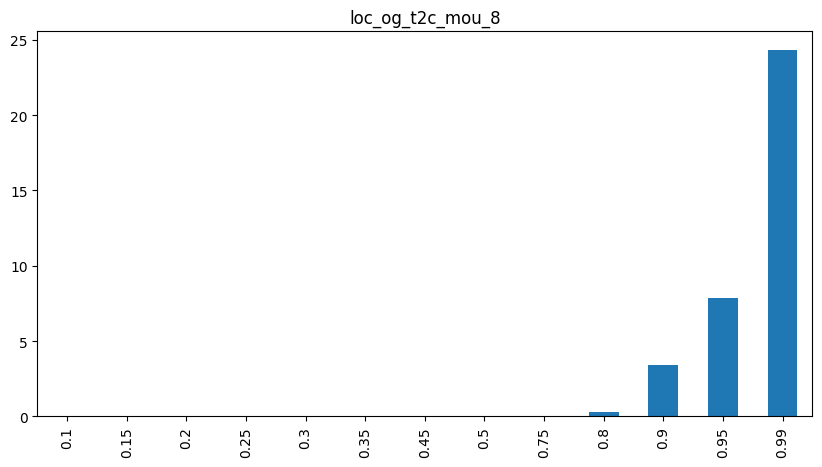

In [106]:
# Plotting quantiles of numeric data as cause of large number of feature sets and large row values,
# visulization will not be possible of complete data

for column in columns_with_null_values:
    if columns_with_null_values[column] == True:
        desc = train_data[column].quantile([0.1,0.15,0.2,0.25,0.3,0.35,0.45,0.5,0.75,0.8,0.9,0.95,0.99])
        fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(40,20))
        desc.plot(kind="bar",figsize=(10,5),title=column,ax=axes)

In [107]:
# Looking in to the plots we can see outlier boundaries

outliers_threshold_for_columns = {
    'roam_ic_mou_6':0.85,
    'roam_ic_mou_7':0.85,
    'roam_ic_mou_8':0.85,
    'roam_og_mou_6':0.85,
    'roam_og_mou_7':0.85,
    'roam_og_mou_8':0.85,
    'loc_og_t2f_mou_6': 0.7,
    'loc_og_t2f_mou_7':0.7,
    'loc_og_t2f_mou_8': 0.7,
    'loc_og_t2c_mou_6': 0.85,
    'loc_og_t2c_mou_7':0.85,
    'loc_og_t2c_mou_8': 0.75,
    'std_og_t2t_mou_6': 0.7,
    'std_og_t2t_mou_7': 0.7,
    'std_og_t2t_mou_8': 0.7,
    'std_og_t2m_mou_6': 0.7,
    'std_og_t2t_mou_7': 0.7,
    'std_og_t2t_mou_8': 0.7,
    'std_og_t2f_mou_6': 0.85,
    'std_og_t2f_mou_7': 0.85,
    'std_og_t2f_mou_8': 0.85,
    'std_og_mou_6': 0.45,
    'std_og_mou_7': 0.45,
    'std_og_mou_8': 0.45,
    'isd_og_mou_6': 0.95,
    'isd_og_mou_7': 0.95,
    'isd_og_mou_8': 0.95,
    'og_others_6': 0.85
    
}

In [108]:
desc = train_data['isd_og_mou_8'].quantile([0.85,0.9,0.95,0.99])

In [109]:
# filling Nan values with mean value

for column in columns_with_null_values:
    if columns_with_null_values[column] == True:
        threshold = outliers_threshold_for_columns.get(column,'')
        if threshold !='':
            # if data has outliers , than mean after removing outlier can be used to inject 'Nan' values
            desc = train_data[column].quantile([threshold])
            threshold_value = desc[threshold]
            temp = train_data[train_data[column]>threshold_value]
            train_data[column] = temp[column].mean()
            
            test_temp = test_data[test_data[column]>threshold_value]
            test_data[column] = test_temp[column].mean()
        else:
            # if data has less outliers than mean can be used to inject 'Nan' values
            train_data[column] = train_data[column].median()
            test_data[column] = test_data[column].median()

In [110]:
# Checking again if any column contains 'Nan' values

train_data[temp_cols].isnull().any().to_dict()

/tmp/ipykernel_26718/3979663368.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_data[temp_cols].isnull().any().to_dict()


{'std_og_t2m_mou_6': False,
 'std_ic_t2t_mou_6': False,
 'arpu_7': False,
 'loc_og_t2c_mou_6': False,
 'isd_og_mou_7': False,
 'count_rech_3g_6': False,
 'monthly_3g_7': False,
 'sachet_2g_8': False,
 'max_rech_data_7': False,
 'roam_og_mou_8': False,
 'total_rech_data_6': False,
 'total_ic_mou_7': False,
 'loc_ic_t2f_mou_6': False,
 'roam_og_mou_7': False,
 'roam_ic_mou_8': False,
 'std_ic_t2o_mou_6': False,
 'sachet_2g_7': False,
 'loc_og_t2m_mou_8': False,
 'loc_ic_t2f_mou_7': False,
 'fb_user_6': False,
 'onnet_mou_7': False,
 'vol_3g_mb_6': False,
 'std_ic_t2t_mou_7': False,
 'circle_id': False,
 'max_rech_data_8': False,
 'last_day_rch_amt_6': False,
 'std_og_t2c_mou_8': False,
 'offnet_mou_8': False,
 'std_og_t2c_mou_6': False,
 'std_og_t2t_mou_7': False,
 'total_rech_data_8': False,
 'count_rech_2g_6': False,
 'monthly_2g_7': False,
 'loc_ic_t2t_mou_6': False,
 'std_og_t2f_mou_6': False,
 'isd_ic_mou_8': False,
 'total_rech_data_7': False,
 'loc_ic_t2m_mou_7': False,
 'total_re

* As we can see above all numeric columns have no null values now.

In [111]:
# Target Column/Variable
# 1- Churn, 0-not churn

train_data['churn_probability'].value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

### Step 2: Data Cleaning and Manipulation

#### Converting categorical features to integer maps

In [112]:
train_data[column_with_type_object].describe()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
count,69999,69600,69266,68898,68765,67538,17568,17865,18417
unique,1,1,1,30,31,31,30,31,31
top,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/31/2014
freq,69999,69600,69266,11880,12206,10324,1317,1282,1388


In [113]:
#  Columns to convert date to day

column_to_be_converted = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6',
                          'date_of_last_rech_data_7','date_of_last_rech_data_8']

# fill nan values in above columns
# train_data[column_to_be_converted] = train_data[column_to_be_converted].fillna(0.0)

In [114]:
train_data[column_to_be_converted]

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014
...,...,...,...,...,...,...
69994,6/18/2014,7/31/2014,8/31/2014,NaN,7/31/2014,8/21/2014
69995,6/28/2014,7/31/2014,8/27/2014,NaN,NaN,NaN
69996,6/25/2014,7/30/2014,8/29/2014,NaN,NaN,NaN
69997,6/29/2014,7/19/2014,8/26/2014,6/17/2014,7/13/2014,8/14/2014


In [115]:
# function to convert date to date

def date_to_day(date_string):
    date_string = str(date_string)
    if date_string == 'nan':
        return 0.0
    else:
        return float(date_string.split("/")[0])

# converting date to day
for column in column_to_be_converted:
    train_data[column] = [date_to_day(x) for x in train_data[column]]
    
    test_data[column] = [date_to_day(x) for x in test_data[column]]    

# train_data[column_to_be_converted] = train_data[column_to_be_converted].apply(lambda x: str(x).split("/")[0])

In [116]:
train_data[column_to_be_converted].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6.0,7.0,8.0,0.0,0.0,0.0
1,6.0,7.0,8.0,0.0,7.0,0.0
2,6.0,7.0,8.0,0.0,0.0,0.0
3,6.0,7.0,8.0,0.0,0.0,0.0
4,6.0,7.0,8.0,6.0,7.0,8.0


#### Dropping unimpacting features

In [117]:
columns_to_drop = columns_with_one_unique_value + ['id']

# dropping from training set
train_data = train_data.drop(columns_to_drop,axis=1)

# dropping from test set
test_data = test_data.drop(columns_to_drop,axis=1)

In [118]:
train_data.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,6.999900e+04,6.999900e+04,6.999900e+04,69999.00,69999.000,6.999900e+04,6.999900e+04,...,69999.000000,69999.000000,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,283.134365,278.185912,278.858826,3.411000e+01,3.228000e+01,3.210000e+01,96.48,91.885,9.180000e+01,6.460185e+01,...,0.081444,0.085487,1.0,1.0,1.0,1220.639709,68.108597,65.935830,60.07674,0.101887
std,334.213918,344.366927,351.924315,7.105478e-15,2.131643e-14,7.105478e-15,0.00,0.000,2.842191e-14,2.842191e-14,...,0.634547,0.680035,0.0,0.0,0.0,952.426321,269.328659,267.899034,257.22681,0.302502
min,-2258.709000,-1289.715000,-945.808000,3.411000e+01,3.228000e+01,3.210000e+01,96.48,91.885,9.180000e+01,6.460185e+01,...,0.000000,0.000000,1.0,1.0,1.0,180.000000,0.000000,0.000000,0.00000,0.000000
25%,93.581000,86.714000,84.095000,3.411000e+01,3.228000e+01,3.210000e+01,96.48,91.885,9.180000e+01,6.460185e+01,...,0.000000,0.000000,1.0,1.0,1.0,468.000000,0.000000,0.000000,0.00000,0.000000
50%,197.484000,191.588000,192.234000,3.411000e+01,3.228000e+01,3.210000e+01,96.48,91.885,9.180000e+01,6.460185e+01,...,0.000000,0.000000,1.0,1.0,1.0,868.000000,0.000000,0.000000,0.00000,0.000000
75%,370.791000,365.369500,369.909000,3.411000e+01,3.228000e+01,3.210000e+01,96.48,91.885,9.180000e+01,6.460185e+01,...,0.000000,0.000000,1.0,1.0,1.0,1813.000000,0.000000,0.000000,0.00000,0.000000
max,27731.088000,35145.834000,33543.624000,3.411000e+01,3.228000e+01,3.210000e+01,96.48,91.885,9.180000e+01,6.460185e+01,...,33.000000,41.000000,1.0,1.0,1.0,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [119]:
pd.DataFrame(train_data.dtypes).value_counts()

float64    132
int64       26
dtype: int64

In [120]:
pd.DataFrame(test_data.dtypes).value_counts()

float64    132
int64       25
dtype: int64

* NOW ALL PREDICTOR FEATURES/COLUMNS ARE NUMERICAL

### Finding Correlation between predictor features

In [121]:
predictor_features = list(train_data.columns)
predictor_features.remove('churn_probability')

target_feature = 'churn_probability'

# seperating predictor and target data in training set
train_X = train_data[predictor_features]
train_Y = train_data[target_feature]

In [122]:
# correlation between predictor variables

train_data_correlation_matrix = train_data.corr()

* With large number of predictors , it is not feasible to visualize the heatmap

In [123]:
train_data_correlation_matrix

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
arpu_6,1.000000,0.743730,0.643193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.066930,0.050399,NaN,NaN,NaN,0.025875,0.168365,0.184225,0.217785,0.025351
arpu_7,0.743730,1.000000,0.782332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.094972,0.065798,NaN,NaN,NaN,0.023818,0.189943,0.218318,0.171154,-0.057809
arpu_8,0.643193,0.782332,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.069332,0.099576,NaN,NaN,NaN,0.033256,0.224868,0.177637,0.157545,-0.157566
onnet_mou_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
onnet_mou_7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aon,0.025875,0.023818,0.033256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.031595,-0.031420,NaN,NaN,NaN,1.000000,0.006073,0.006673,0.001365,-0.135177
aug_vbc_3g,0.168365,0.189943,0.224868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.089689,0.101584,NaN,NaN,NaN,0.006073,1.000000,0.691012,0.573275,-0.063040
jul_vbc_3g,0.184225,0.218318,0.177637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.103164,0.085656,NaN,NaN,NaN,0.006673,0.691012,1.000000,0.676636,-0.040102
jun_vbc_3g,0.217785,0.171154,0.157545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.093014,0.077467,NaN,NaN,NaN,0.001365,0.573275,0.676636,1.000000,-0.022574


In [124]:
train_data_correlation_matrix.shape

(158, 158)

In [125]:
high_corelation_matrix = train_data_correlation_matrix[((train_data_correlation_matrix>0.15)|(train_data_correlation_matrix<-0.15))&(train_data_correlation_matrix!=1.0)]

In [126]:
# Plotting Correlation heatmap (difficult to visualize)

# fig,ax = plt.subplots(figsize=(40,40))
# sns.heatmap(high_corelation_matrix,ax=ax,annot=True)

high_corelation_matrix.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
arpu_6,NaN,0.743730,0.643193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.168365,0.184225,0.217785,NaN
arpu_7,0.743730,NaN,0.782332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.189943,0.218318,0.171154,NaN
arpu_8,0.643193,0.782332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.224868,0.177637,0.157545,-0.157566
onnet_mou_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
onnet_mou_7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Correlation of predictors with Target variable 

In [127]:
high_corelation_matrix['churn_probability'].describe()

count    7.000000
mean    -0.187418
std      0.047402
min     -0.290585
25%     -0.188572
50%     -0.167043
75%     -0.159793
max     -0.157566
Name: churn_probability, dtype: float64

In [128]:
high_corelation_matrix['churn_probability']

arpu_6                    NaN
arpu_7                    NaN
arpu_8              -0.157566
onnet_mou_6               NaN
onnet_mou_7               NaN
                       ...   
aon                       NaN
aug_vbc_3g                NaN
jul_vbc_3g                NaN
jun_vbc_3g                NaN
churn_probability         NaN
Name: churn_probability, Length: 158, dtype: float64

In [129]:
target_df = high_corelation_matrix['churn_probability'].isna().to_frame()

In [130]:
target_df

,churn_probability
arpu_6,True
arpu_7,True
arpu_8,False
onnet_mou_6,True
onnet_mou_7,True
...,...
aon,True
aug_vbc_3g,True
jul_vbc_3g,True
jun_vbc_3g,True


In [131]:
target_df.shape

(158, 1)

In [132]:
# Columns/features with highest of correlation with Churn

print("Columns/Features with high Correlation :\n")
for i in range(target_df.shape[0]):
    if target_df['churn_probability'][i] == False:
        print("{}. {}".format(i+1,target_df.index[i]))

Columns/Features with high Correlation :

3. arpu_8
81. total_ic_mou_8
93. total_rech_num_8
96. total_rech_amt_8
99. max_rech_amt_8
101. date_of_last_rech_7
102. date_of_last_rech_8


* As we can see from above analysis Average Revenue Per User impacts Churn probability
* Total Recharges, Total Recharge Amount , Total Voice call minutes, Date of last recharge and high impacting
  features on user's churn.

### Dimensionality Reduction using PCA

In [133]:
from sklearn.decomposition import PCA

In [134]:
# Scaling on complete train_data dataset for PCA

pca_scaler = StandardScaler()
scaled_train_data_pca = pca_scaler.fit_transform(train_X)
scaled_train_data_pca = pd.DataFrame(scaled_train_data_pca,columns=train_X.columns)

In [135]:
scaled_train_data_pca.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,-0.753587,-0.555159,-0.771000,-7.105427e-15,2.131628e-14,-7.105427e-15,0.0,0.0,2.842171e-14,2.842171e-14,...,-0.13149,-0.128351,-0.12571,0.0,0.0,0.0,0.774197,-0.252885,-0.246124,-0.233557
1,-0.847171,-0.451263,-0.670336,-7.105427e-15,2.131628e-14,-7.105427e-15,0.0,0.0,2.842171e-14,2.842171e-14,...,-0.13149,-0.128351,-0.12571,0.0,0.0,0.0,-0.536150,-0.252885,-0.246124,-0.233557
2,-0.665232,-0.508211,-0.792389,-7.105427e-15,2.131628e-14,-7.105427e-15,0.0,0.0,2.842171e-14,2.842171e-14,...,-0.13149,-0.128351,-0.12571,0.0,0.0,0.0,-0.355557,-0.252885,-0.246124,-0.233557
3,-0.379318,-0.211770,-0.476708,-7.105427e-15,2.131628e-14,-7.105427e-15,0.0,0.0,2.842171e-14,2.842171e-14,...,-0.13149,-0.128351,-0.12571,0.0,0.0,0.0,-0.250562,-0.252885,-0.246124,-0.233557
4,-0.126945,-0.435570,-0.503788,-7.105427e-15,2.131628e-14,-7.105427e-15,0.0,0.0,2.842171e-14,2.842171e-14,...,-0.13149,1.447588,-0.12571,0.0,0.0,0.0,-0.602297,-0.252885,-0.246124,-0.233557


In [136]:
# PCA on main dataset (train_data)

pca = PCA(n_components=44,random_state=42)
pca.fit(scaled_train_data_pca)

pca_used = False

In [137]:
pca.components_

array([[ 0.23490281,  0.2537905 ,  0.24213524, ...,  0.15942026,
         0.16306011,  0.15330508],
       [ 0.16167269,  0.17580893,  0.16545569, ..., -0.18163459,
        -0.19006629, -0.18078238],
       [-0.01660521, -0.02575845, -0.01985373, ...,  0.09522327,
         0.10365305,  0.10639678],
       ...,
       [-0.20395263, -0.01920481,  0.20696271, ...,  0.14209163,
         0.02405001, -0.15916909],
       [-0.39795923,  0.08363517,  0.28009176, ..., -0.03083374,
        -0.04094817,  0.06688729],
       [-0.11568412,  0.25652384, -0.18616633, ...,  0.09024147,
        -0.10124213,  0.02898265]])

In [138]:
pca.explained_variance_ratio_.cumsum()

array([0.19867142, 0.3112632 , 0.39724395, 0.45820258, 0.50429877,
       0.54539411, 0.58222515, 0.61787487, 0.64367133, 0.66884056,
       0.69307664, 0.71333483, 0.7322567 , 0.75016984, 0.76790309,
       0.78422738, 0.80004811, 0.81508041, 0.82915077, 0.84304655,
       0.8559424 , 0.8685698 , 0.87966104, 0.89032362, 0.89951059,
       0.90851232, 0.91630604, 0.92366384, 0.93075812, 0.93744502,
       0.94394706, 0.94990593, 0.95556469, 0.96076079, 0.96579942,
       0.9706041 , 0.97514411, 0.97898588, 0.98238762, 0.98546807,
       0.98822614, 0.99077533, 0.99308237, 0.99511261])

* As we see 44 components explains 99% of the variance (information) in the dataset

In [139]:
pca_train_X = pca.fit_transform(train_X)

# generating column names for components
pc_components_column = ["pc-{}".format(i) for i in range(44)]
pca_train_X = pd.DataFrame(pca_train_X,columns=pc_components_column)

In [140]:
pca_train_X.head()

,pc-0,pc-1,pc-2,pc-3,pc-4,pc-5,pc-6,pc-7,pc-8,pc-9,...,pc-34,pc-35,pc-36,pc-37,pc-38,pc-39,pc-40,pc-41,pc-42,pc-43
0,-732.491152,-754.036829,182.826077,-282.883232,-44.183272,33.622621,-27.677673,47.506516,82.702865,20.431402,...,-0.205717,-0.732193,0.010675,0.014772,0.070937,0.146487,0.005841,-0.040048,-0.020706,0.023208
1,-860.938578,480.429371,154.133347,-100.876345,147.368162,28.577366,5.985936,151.724907,-22.629727,91.604434,...,-3.019597,0.067427,0.161629,-0.063138,0.045570,-0.549749,-0.658325,-0.618034,-0.155783,-0.092918
2,-823.645874,302.819353,131.726393,-88.285319,-18.050521,59.657086,-22.359397,25.188114,110.938848,7.690685,...,-0.059389,-0.843814,-0.001660,0.034073,0.064651,0.018461,-0.133736,-0.013300,-0.009457,-0.007081
3,-594.949262,204.647462,53.851102,-37.731908,105.327665,127.695623,2.497590,6.955224,129.766521,1.805613,...,-0.065666,-0.759214,-0.047936,0.042949,0.105876,0.035500,-0.120081,0.021969,-0.010074,-0.008536
4,-663.461177,555.169370,78.145803,-17.084644,148.963091,298.577236,-54.953990,196.111428,-288.669294,191.846438,...,-0.250372,-0.731439,-0.703223,-0.020962,0.258322,-0.865592,-0.595945,-0.142264,-0.148295,0.858644


In [141]:
# replacing train_X with pca_train_X if pca is used for reduction
if pca_used == True:
    train_X = pca_train_X

### Step 3: Standardising and Preparing Data for Modelling

In [142]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [143]:
# splitting training and test data from dataset (train_data)

X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [144]:
X_train.shape

(48999, 157)

In [145]:
X_test.shape

(21000, 157)

In [146]:
# Standard scaler
standard_scaler = StandardScaler()

# scaling training data
columns = list(train_X.columns)
scaled_train_X = standard_scaler.fit_transform(X_train)
scaled_train_X = pd.DataFrame(scaled_train_X,columns=columns)

In [147]:
scaled_train_X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,-0.403048,-0.467090,-0.151059,-7.105427e-15,1.421085e-14,-1.421085e-14,0.0,0.0,2.842171e-14,2.842171e-14,...,-0.127099,-0.127373,1.414443,0.0,0.0,0.0,-0.079445,0.971060,0.633541,0.433551
1,-0.516249,-0.690846,-0.472585,-7.105427e-15,1.421085e-14,-1.421085e-14,0.0,0.0,2.842171e-14,2.842171e-14,...,-0.127099,-0.127373,-0.126759,0.0,0.0,0.0,-0.475246,-0.253647,-0.244543,-0.228676
2,1.296779,0.932378,0.751816,-7.105427e-15,1.421085e-14,-1.421085e-14,0.0,0.0,2.842171e-14,2.842171e-14,...,-0.127099,-0.127373,-0.126759,0.0,0.0,0.0,2.273316,-0.253647,-0.244543,-0.228676
3,-0.532688,-0.556712,-0.225263,-7.105427e-15,1.421085e-14,-1.421085e-14,0.0,0.0,2.842171e-14,2.842171e-14,...,-0.127099,-0.127373,-0.126759,0.0,0.0,0.0,0.034991,-0.253647,-0.244543,-0.228676
4,-0.601213,-0.370232,-0.535844,-7.105427e-15,1.421085e-14,-1.421085e-14,0.0,0.0,2.842171e-14,2.842171e-14,...,-0.127099,-0.127373,-0.126759,0.0,0.0,0.0,2.097988,-0.253647,-0.244543,-0.228676


In [148]:
# Min Max Scaler
minmax_scaler = MinMaxScaler()

# Scaling training data
columns = list(train_X.columns)
minmax_scaled_train_X = minmax_scaler.fit_transform(X_train)
minmax_scaled_train_X = pd.DataFrame(minmax_scaled_train_X,columns=columns)


In [149]:
minmax_scaled_train_X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,0.080166,0.038457,0.012498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.02439,0.0,0.0,0.0,0.233148,0.039293,0.025204,0.015341
1,0.078887,0.036264,0.009013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.142063,0.000000,0.000000,0.000000
2,0.099374,0.052171,0.022282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.774583,0.000000,0.000000,0.000000
3,0.078701,0.037579,0.011693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.259483,0.000000,0.000000,0.000000
4,0.077927,0.039406,0.008328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.734235,0.000000,0.000000,0.000000


## Step 3: Modelling and Evaluation

### Naive Bayes Model (Base Model)

In [150]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [151]:
# Naive Bayes Classification model
MN_model = MultinomialNB()

# fitting model
MN_model.fit(minmax_scaled_train_X,y_train)


MultinomialNB()

In [152]:
# Evaluating model

# scaling test data for prediction
scaled_test_data = minmax_scaler.transform(X_test)

# predicting on test subset
y_predicted = MN_model.predict(scaled_test_data)

/home/sam/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


#### Model Evaluation

In [153]:
print("Multinomial Model - Accuracy Score: {}%".format(round(accuracy_score(y_test,y_predicted)*100,3)))

Multinomial Model - Accuracy Score: 90.005%


### Random Forest Classifier (Ensemble)

In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [155]:
# Finding best hyper parameters for Random Forest Model

params = {
    'n_estimators': [50,70,100,150,200],
    'max_depth': [None,10,20],
    'random_state': [None,20,50,100]
}

model_grid = GridSearchCV(estimator=RandomForestClassifier(),
                         param_grid=params,
                         cv=5,
                         n_jobs=2)

# fitting on grid model
# model_grid.fit(scaled_train_X,y_train)

In [156]:
# best estimators

# model_grid.best_estimator_

In [157]:
# model_grid.best_params_

* Based on hyper parameter tuning for RandomForestModel we got 
* Best params : {'max_depth': 10, 'n_estimators': 70, 'random_state': None}

In [158]:
# Ensemble model for best parameters from hyperparameter tuning

try:
    n_estimators_bv = model_grid.best_params_['n_estimators']
    max_depth_bv = model_grid.best_params_['max_depth']
    random_state_bv = model_grid.best_params_['random_state']
except:
    # Default values as best parameters from gridsearch (in case not running GridSearchCV)
    n_estimators_bv = 70
    max_depth_bv = 10
    random_state_bv = None

print(n_estimators_bv,max_depth_bv,random_state_bv)
RF_model = RandomForestClassifier(n_estimators=n_estimators_bv,max_depth=max_depth_bv,random_state=random_state_bv)

# fitting model
RF_model.fit(scaled_train_X,y_train)

70 10 None


RandomForestClassifier(max_depth=10, n_estimators=70)

In [159]:
# Evaluating model 

# scaling test data for prediction
scaled_test_data = standard_scaler.transform(X_test)

# predicting on test subset
y_predicted = RF_model.predict(scaled_test_data)

/home/sam/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#### Model Evaluation

* Got 94.19 % accuracy with default hyperparameters
* Got 94.238% accuracy with Hyper parameters :{'max_depth': 10, 'n_estimators': 70, 'random_state': None}
* Got 94.195% accuracy with Hyper parameters: {'max_depth': 10, 'n_estimators': 150, 'random_state': 20}

* Got 91.567% accuracy with Optimized parameters and 44 PCA components , So will not be using reduced components

In [160]:
print("Random Forest Model - Accuracy Score: {}%".format(round(accuracy_score(y_test,y_predicted)*100,3)))

Random Forest Model - Accuracy Score: 94.243%


### Generating Predictions on the provided test data (test_data) using the appropriate model

In [161]:
# final model (as Random forest is giving higher accuracy)
final_model = RF_model
final_scaler = standard_scaler

In [162]:
# Standardising 
final_scaled_test_data = final_scaler.transform(test_data)

# making churn predictions
predictons = final_model.predict(final_scaled_test_data)

/home/sam/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [163]:
predictons.shape

(30000,)

In [164]:
set(predictons)

{0, 1}

In [165]:
test_data.shape

(30000, 157)

In [166]:
submission_df = pd.DataFrame({'Id':test_data_original['id'],'churn_probability': predictons})

In [167]:
# Generating csv for submission
submission_df.to_csv("./Submission.csv",index=False)